
<div style="background-color: #FFD700; color: #333333; padding: 10px;">

# **Human Resources Analysis Predict Attrition**

</div>

<div style="background-color: #f0f0f0; color: #000000; padding: 10px;">
  <strong>Project Contributors</strong>
  <ul>
    <li>Gonçalo Alves</li>
    <li>Gonçalo Eloy</li>
    <li>Maria Beatriz Amado</li>
    <li>Mariana Pereira</li>
  </ul>
</div>

<div style="background-color: #3399CC; color: white; padding: 10px;">
<a id='scrub'>
<h3 style="color: white;"><strong>Introduction</strong></h3>
</a>
</div>

This project aims to predict employee attrition within a specific company's workforce. 

As data scientists, our goal is to create a model that estimates the likelihood of an employee staying or quitting based on their characteristics. 

Despite the complexity and incomplete data, our model will assist the HR team in taking preventive measures to reduce attrition, such as adjusting salaries, promoting engaging projects, and offering remote work options. This project provides a valuable opportunity to explore feature extraction from diverse data sources and addresses key questions for a multinational consultancy firm regarding employee retention. 

Our main objectives encompass descriptive analytics to uncover correlations and predictive analytics to build classification models for attrition prediction.


In [767]:
#pip install --upgrade pip
#pip install pandas
#pip install matplotlib
#pip install seaborn

In [768]:
#pip install scikit-learn


<a id='toc'></a>

### Table of Contents
* [1. Obtain Data](#obtain) <br>
    * [1.1 Load libraries](#lib)<br>
    * [1.2. Import data](#import)<br>
    * [1.3. Dimensionality of the dataframe](#dim)<br>
    * [1.4. Check missing values](#miss)<br>

* [2. Scrub data](#scrub) <br>
    * [2.1. Information about columns](#info) <br>
    * [2.2. Checking duplicate values](#duplicates)<br>
    * [2.3. Missing values](#var)<br>
        * [2.3.1. Categorical Variables](#cat)<br>
        * [2.3.2. Numerical Variables](#num)<br>
    * [2.4. Data Cleaning: Outliers](#out)<br> 

* [3. Explore data](#explore) <br>
        * [3.1. Basic Exploration](#exp)<br>
        * [3.2. Data Visualization](#vis)<br>
        * [3.3. Statistical Exploration](#stat)<br>


* [4. Model](#model) <br>
* [5. Interpret](#int) <br>





<div style="background-color: #3399CC; color: white; padding: 10px;">
<a id='scrub'>
<h3 style="color: white;"><strong>1. Obtain Data</strong></h3>
</a>
</div>

**__`1.1`__ Load Libraries**

<a id='lib'></a>


In [769]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**__`1.2`__ Import data**

<a id='import'></a>

In [770]:
data= pd.read_csv("https://raw.githubusercontent.com/beatrizamado/HR-Analysis/main/HR_DS.csv")
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

**__`1.3`__ Dimensionality of the dataframe**

<a id='dim'></a>

In [771]:
data.shape

(1470, 35)

In [772]:
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

O dataset é unbalanced. Significa que vamos ter de fazer um resampling/ k-fold stratified cross validation e afins

**__`1.4`__ Checking missing values**

<a id='miss'></a>

In [773]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<div style="background-color: #3399CC; color: white; padding: 10px;">
<a id='scrub'>
<h3 style="color: white;"><strong>2. Describe Data</strong></h3>
</a>
</div>


**__`2.1`__ Information about columns**

<a id='info'></a>

In [774]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [775]:
data.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

**__`2.2`__ Checking duplicates**

<a id='duplicates'></a>

In [776]:
duplicates=data[data.duplicated()] # save all duplicate rows
print("There are {} duplicates.".format(list(data.duplicated()).count(True)))
data.drop_duplicates(inplace = True) #remove duplicates

data.reset_index(inplace=True)
data.drop("index", inplace=True, axis=1)
print("\n")
print("All the duplicates were saved in a dataframe named:'Duplicates'")

There are 0 duplicates.


All the duplicates were saved in a dataframe named:'Duplicates'


In [777]:
data.set_index('EmployeeNumber', inplace = True)

**__`2.3`__ Missing values**

<a id='var'></a>

In [778]:
categoricalVar = data.select_dtypes(include=['object']).columns.tolist()
numericalVar= data.select_dtypes(exclude=['object']).columns.tolist()

print("\nThe numerical variables are: \n{}.".format((numericalVar)))
print("\nThe non-numerical variables are:\n{}.".format(categoricalVar))

print("\nIn summary:")
pd.DataFrame(([categoricalVar, numericalVar]),index = ['Categorical Variables', 'Numerical Variables']).T


The numerical variables are: 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'].

The non-numerical variables are:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'].

In summary:


Categorical Variables       Numerical Variables
0              Attrition                       Age
1         BusinessTravel                 DailyRate
2             Department          DistanceFromHome
3         EducationField                 Education
4                 Gender             EmployeeCount
5                JobRole   EnvironmentSatisfaction
6          MaritalStatus                HourlyRate
7                 Over18            JobInvolvement
8               OverTime                  JobLevel
9                   None           JobSatisfaction
10                  None             MonthlyIncome
11                  None               MonthlyRate
12                  None        NumCompaniesWorked
13                  None         PercentSalaryHike
14                  None         PerformanceRating
15                  None  RelationshipSatisfaction
16                  None             StandardHours
17                  None          StockOptionLevel
18                  None         TotalWorkingYears
19                  None     TrainingTimesLastYear
20                  None           WorkLifeBalance
21                  None            YearsAtCompany
22                  None        YearsInCurrentRole
23                  None   YearsSinceLastPromotion
24                  None      YearsWithCurrManager

**__`2.3.1.`__ Categorical Variables**

<a id='cat'></a>

In [779]:
pd.DataFrame(data[categoricalVar]).describe()

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

* **Attrition**

In [780]:
null_count = data["Attrition"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["Attrition"].unique()
print("The unique values in the Attrition are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Attrition are: ['Yes' 'No'].




In [781]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Attrition_Num'] = label_encoder.fit_transform(data['Attrition'])


In [782]:
data['Attrition_Num']

EmployeeNumber
1       1
2       0
4       1
5       0
7       0
       ..
2061    0
2062    0
2064    0
2065    0
2068    0
Name: Attrition_Num, Length: 1470, dtype: int32

In [783]:
data

Age Attrition     BusinessTravel  DailyRate  \
EmployeeNumber                                                
1                41       Yes      Travel_Rarely       1102   
2                49        No  Travel_Frequently        279   
4                37       Yes      Travel_Rarely       1373   
5                33        No  Travel_Frequently       1392   
7                27        No      Travel_Rarely        591   
...             ...       ...                ...        ...   
2061             36        No  Travel_Frequently        884   
2062             39        No      Travel_Rarely        613   
2064             27        No      Travel_Rarely        155   
2065             49        No  Travel_Frequently       1023   
2068             34        No      Travel_Rarely        628   

                            Department  DistanceFromHome  Education  \
EmployeeNumber                                                        
1                                Sales                 1          2   
2               Research & Development                 8          1   
4               Research & Development                 2          2   
5               Research & Development                 3          4   
7               Research & Development                 2          1   
...                                ...               ...        ...   
2061            Research & Development                23          2   
2062            Research & Development                 6          1   
2064            Research & Development                 4          3   
2065                             Sales                 2          3   
2068            Research & Development                 8          3   

               EducationField  EmployeeCount  EnvironmentSatisfaction  Gender  \
EmployeeNumber                                                                  
1               Life Sciences              1                        2  Female   
2               Life Sciences              1                        3    Male   
4                       Other              1                        4    Male   
5               Life Sciences              1                        4  Female   
7                     Medical              1                        1    Male   
...                       ...            ...                      ...     ...   
2061                  Medical              1                        3    Male   
2062                  Medical              1                        4    Male   
2064            Life Sciences              1                        2    Male   
2065                  Medical              1                        4    Male   
2068                  Medical              1                        2    Male   

                HourlyRate  JobInvolvement  JobLevel  \
EmployeeNumber                                         
1                       94               3         2   
2                       61               2         2   
4                       92               2         1   
5                       56               3         1   
7                       40               3         1   
...                    ...             ...       ...   
2061                    41               4         2   
2062                    42               2         3   
2064                    87               4         2   
2065                    63               2         2   
2068                    82               4         2   

                                  JobRole  JobSatisfaction MaritalStatus  \
EmployeeNumber                                                             
1                         Sales Executive                4        Single   
2                      Research Scientist                2       Married   
4                   Laboratory Technician                3        Single   
5                      Research Scientist                3       Married   
7                   Laboratory Te

In [784]:
data = data.drop('Attrition', axis=1)

In [785]:
data

Age     BusinessTravel  DailyRate              Department  \
EmployeeNumber                                                              
1                41      Travel_Rarely       1102                   Sales   
2                49  Travel_Frequently        279  Research & Development   
4                37      Travel_Rarely       1373  Research & Development   
5                33  Travel_Frequently       1392  Research & Development   
7                27      Travel_Rarely        591  Research & Development   
...             ...                ...        ...                     ...   
2061             36  Travel_Frequently        884  Research & Development   
2062             39      Travel_Rarely        613  Research & Development   
2064             27      Travel_Rarely        155  Research & Development   
2065             49  Travel_Frequently       1023                   Sales   
2068             34      Travel_Rarely        628  Research & Development   

                DistanceFromHome  Education EducationField  EmployeeCount  \
EmployeeNumber                                                              
1                              1          2  Life Sciences              1   
2                              8          1  Life Sciences              1   
4                              2          2          Other              1   
5                              3          4  Life Sciences              1   
7                              2          1        Medical              1   
...                          ...        ...            ...            ...   
2061                          23          2        Medical              1   
2062                           6          1        Medical              1   
2064                           4          3  Life Sciences              1   
2065                           2          3        Medical              1   
2068                           8          3        Medical              1   

                EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
EmployeeNumber                                                                
1                                     2  Female          94               3   
2                                     3    Male          61               2   
4                                     4    Male          92               2   
5                                     4  Female          56               3   
7                                     1    Male          40               3   
...                                 ...     ...         ...             ...   
2061                                  3    Male          41               4   
2062                                  4    Male          42               2   
2064                                  2    Male          87               4   
2065                                  4    Male          63               2   
2068                                  2    Male          82               4   

                JobLevel                    JobRole  JobSatisfaction  \
EmployeeNumber                                                         
1                      2            Sales Executive                4   
2                      2         Research Scientist                2   
4                      1      Laboratory Technician                3   
5                      1         Research Scientist                3   
7                      1      Laboratory Technician                2   
...                  ...                        ...              ...   
2061                   2      Laboratory Technician                4   
2062                   3  Healthcare Representative                1   
2064                   2     Manufacturing Director                2   
2065                   2            Sales Executive                2   
2068                   2      Laboratory Technician                3   

               MaritalStatus  MonthlyIncome  Mo

* **Business Travel**

In [786]:
null_count = data["BusinessTravel"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["BusinessTravel"].unique()
print("The unique values in the Business Travel are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Business Travel are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'].




In [787]:
def create_travel_column(row):
    if row['BusinessTravel'] == 'Non-Travel':
        return 1
    else:
        return 0

# Apply the function to create a new column 'travel'
data['Travel_Flag'] = data.apply(create_travel_column, axis=1)

In [788]:
data ['Travel_Flag'].value_counts()

Travel_Flag
0    1320
1     150
Name: count, dtype: int64

In [789]:
data = data.drop('BusinessTravel', axis=1)

* **Department**


In [790]:
null_count = data["Department"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["Department"].unique()
print("The unique values in the Department are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Department are: ['Sales' 'Research & Development' 'Human Resources'].




In [791]:
category_mapping = {
    'Sales': 1,
    'Research & Development': 2,
    'Human Resources': 0,
    
}

def create_department_column(row):
    return category_mapping.get(row['Department'], 0)  

data['Department_Flag'] = data.apply(create_department_column, axis=1)

In [792]:
data

Age  DailyRate              Department  DistanceFromHome  \
EmployeeNumber                                                             
1                41       1102                   Sales                 1   
2                49        279  Research & Development                 8   
4                37       1373  Research & Development                 2   
5                33       1392  Research & Development                 3   
7                27        591  Research & Development                 2   
...             ...        ...                     ...               ...   
2061             36        884  Research & Development                23   
2062             39        613  Research & Development                 6   
2064             27        155  Research & Development                 4   
2065             49       1023                   Sales                 2   
2068             34        628  Research & Development                 8   

                Education EducationField  EmployeeCount  \
EmployeeNumber                                            
1                       2  Life Sciences              1   
2                       1  Life Sciences              1   
4                       2          Other              1   
5                       4  Life Sciences              1   
7                       1        Medical              1   
...                   ...            ...            ...   
2061                    2        Medical              1   
2062                    1        Medical              1   
2064                    3  Life Sciences              1   
2065                    3        Medical              1   
2068                    3        Medical              1   

                EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
EmployeeNumber                                                                
1                                     2  Female          94               3   
2                                     3    Male          61               2   
4                                     4    Male          92               2   
5                                     4  Female          56               3   
7                                     1    Male          40               3   
...                                 ...     ...         ...             ...   
2061                                  3    Male          41               4   
2062                                  4    Male          42               2   
2064                                  2    Male          87               4   
2065                                  4    Male          63               2   
2068                                  2    Male          82               4   

                JobLevel                    JobRole  JobSatisfaction  \
EmployeeNumber                                                         
1                      2            Sales Executive                4   
2                      2         Research Scientist                2   
4                      1      Laboratory Technician                3   
5                      1         Research Scientist                3   
7                      1      Laboratory Technician                2   
...                  ...                        ...              ...   
2061                   2      Laboratory Technician                4   
2062                   3  Healthcare Representative                1   
2064                   2     Manufacturing Director                2   
2065                   2            Sales Executive                2   
2068                   2      Laboratory Technician                3   

               MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
EmployeeNumber                                                                 
1                     Single           5993        19479                   8   
2                    Married           5130        249

* **Education Field**

In [793]:
null_count = data["EducationField"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["EducationField"].unique()
print("The unique values in the Education Field are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Education Field are: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'].




In [794]:
category_mapping2 = {
    'Life Sciences': 1,
    'Medical': 2,
    'Marketing': 3,
    'Technical Degree': 4,
    'Human Resources':5,
    'Other': 0,
}

def create_edfield_column(row):
    return category_mapping2.get(row['EducationField'], 0)  

data['EducationField_Flag'] = data.apply(create_edfield_column, axis=1)

In [795]:
category_mapping = {
    'Sales Executive': 1,
    'Research Scientist': 2,      
    'Laboratory Technician':3,     
    'Manufacturing Director':4, 
    'Healthcare Representative':5,   
    'Manager':6,                
    'Sales Representative':7,       
    'Research Director':8,         
    'Human Resources':0,           
    
}

def create_jobrole_column(row):
    return category_mapping.get(row['JobRole'], 1)  

data['JobRole_Flag'] = data.apply(create_jobrole_column, axis=1)

In [796]:
category_mapping2 = {
    'Married': 1,
    'Divorced': 2,
    'Single': 0,
   
}

def create_edfield_column(row):
    return category_mapping2.get(row['MaritalStatus'], 0)  

data['MaritalStatus_Flag'] = data.apply(create_edfield_column, axis=1)

In [797]:
data['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

* **Gender**

In [798]:
null_count = data["Gender"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["Gender"].unique()
print("The unique values in the Gender are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Gender are: ['Female' 'Male'].




In [799]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Gender_Flag'] = label_encoder.fit_transform(data['Gender'])

In [800]:
data

Age  DailyRate              Department  DistanceFromHome  \
EmployeeNumber                                                             
1                41       1102                   Sales                 1   
2                49        279  Research & Development                 8   
4                37       1373  Research & Development                 2   
5                33       1392  Research & Development                 3   
7                27        591  Research & Development                 2   
...             ...        ...                     ...               ...   
2061             36        884  Research & Development                23   
2062             39        613  Research & Development                 6   
2064             27        155  Research & Development                 4   
2065             49       1023                   Sales                 2   
2068             34        628  Research & Development                 8   

                Education EducationField  EmployeeCount  \
EmployeeNumber                                            
1                       2  Life Sciences              1   
2                       1  Life Sciences              1   
4                       2          Other              1   
5                       4  Life Sciences              1   
7                       1        Medical              1   
...                   ...            ...            ...   
2061                    2        Medical              1   
2062                    1        Medical              1   
2064                    3  Life Sciences              1   
2065                    3        Medical              1   
2068                    3        Medical              1   

                EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
EmployeeNumber                                                                
1                                     2  Female          94               3   
2                                     3    Male          61               2   
4                                     4    Male          92               2   
5                                     4  Female          56               3   
7                                     1    Male          40               3   
...                                 ...     ...         ...             ...   
2061                                  3    Male          41               4   
2062                                  4    Male          42               2   
2064                                  2    Male          87               4   
2065                                  4    Male          63               2   
2068                                  2    Male          82               4   

                JobLevel                    JobRole  JobSatisfaction  \
EmployeeNumber                                                         
1                      2            Sales Executive                4   
2                      2         Research Scientist                2   
4                      1      Laboratory Technician                3   
5                      1         Research Scientist                3   
7                      1      Laboratory Technician                2   
...                  ...                        ...              ...   
2061                   2      Laboratory Technician                4   
2062                   3  Healthcare Representative                1   
2064                   2     Manufacturing Director                2   
2065                   2            Sales Executive                2   
2068                   2      Laboratory Technician                3   

               MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
EmployeeNumber                                                                 
1                     Single           5993        19479                   8   
2                    Married           5130        249

* **Job Role**

In [801]:
null_count = data["JobRole"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["JobRole"].unique()
print("The unique values in the Job Role are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Job Role are: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'].




* **Marital Status**

In [802]:
null_count = data["MaritalStatus"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["MaritalStatus"].unique()
print("The unique values in the Marital Status are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Marital Status are: ['Single' 'Married' 'Divorced'].




* **Over 18**

In [803]:
null_count = data["Over18"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["Over18"].unique()
print("The unique values in the Over 18 are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Over 18 are: ['Y'].




In [804]:
over_18_column = data[['Over18']]

print(over_18_column)

               Over18
EmployeeNumber       
1                   Y
2                   Y
4                   Y
5                   Y
7                   Y
...               ...
2061                Y
2062                Y
2064                Y
2065                Y
2068                Y

[1470 rows x 1 columns]


* **Overtime**

In [805]:
null_count = data["OverTime"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["OverTime"].unique()
print("The unique values in the Overtime : {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Overtime : ['Yes' 'No'].




In [806]:
def create_overtime_column(row):
    if row['OverTime'] == 'Yes':
        return 1
    else:
        return 0

# Apply the function to create a new column 'travel'
data['OverTime_Flag'] = data.apply(create_overtime_column, axis=1)

In [807]:
data.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Department      1470 non-null   object
 1   EducationField  1470 non-null   object
 2   Gender          1470 non-null   object
 3   JobRole         1470 non-null   object
 4   MaritalStatus   1470 non-null   object
 5   Over18          1470 non-null   object
 6   OverTime        1470 non-null   object
dtypes: object(7)
memory usage: 91.9+ KB


## A TRABALHAR AQUI

In [808]:
data = data.drop(['Gender', 'Department', 'EducationField','MaritalStatus', 'JobRole', 'OverTime', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1)


**__`2.3.2.`__ Numerical Variables**

<a id='num'></a>


* **Education**

In [809]:
null_count = data["Education"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["Education"].unique()
print("The unique values in the Education are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Education are: [2 1 4 3 5].




* **Age**

In [810]:
null_count = data["Age"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["Age"].unique()
print("The unique values in the Age are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Age are: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60].




* **Monthly Income**

In [811]:
null_count = data["MonthlyIncome"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["MonthlyIncome"].unique()
print("The unique values in the MonthlyIncome are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the MonthlyIncome are: [5993 5130 2090 ... 9991 5390 4404].




**__`2.3.3.`__ Cardinality**

<a id='cat'></a>

**__`2.3.4.`__ Correlations**

<a id='cat'></a>

**__`2.4`__ Data Cleaning: Outliers**

<a id='out'></a>

In [812]:
import numpy as np

In [813]:
MonthlyIncome=data['MonthlyIncome']

# Percentiles
p25 = np.percentile(MonthlyIncome, 25)
p75 = np.percentile(MonthlyIncome, 75)

# Interquartile range (IQR)
IQR = p75 - p25

# Inferior and superior limits of outlier detection
lim_inf = p25 - 1.5 * IQR
lim_sup = p75 + 1.5 * IQR

# Identifying outliers
outliers = data[(MonthlyIncome < lim_inf) | (MonthlyIncome > lim_sup)]

outliers.count()

Age                         114
DailyRate                   114
DistanceFromHome            114
Education                   114
EnvironmentSatisfaction     114
HourlyRate                  114
JobInvolvement              114
JobLevel                    114
JobSatisfaction             114
MonthlyIncome               114
MonthlyRate                 114
NumCompaniesWorked          114
PercentSalaryHike           114
PerformanceRating           114
RelationshipSatisfaction    114
StockOptionLevel            114
TotalWorkingYears           114
TrainingTimesLastYear       114
WorkLifeBalance             114
YearsAtCompany              114
YearsInCurrentRole          114
YearsSinceLastPromotion     114
YearsWithCurrManager        114
Attrition_Num               114
Travel_Flag                 114
Department_Flag             114
EducationField_Flag         114
JobRole_Flag                114
MaritalStatus_Flag          114
Gender_Flag                 114
OverTime_Flag               114
dtype: i

In [814]:
data

Age  DailyRate  DistanceFromHome  Education  \
EmployeeNumber                                                
1                41       1102                 1          2   
2                49        279                 8          1   
4                37       1373                 2          2   
5                33       1392                 3          4   
7                27        591                 2          1   
...             ...        ...               ...        ...   
2061             36        884                23          2   
2062             39        613                 6          1   
2064             27        155                 4          3   
2065             49       1023                 2          3   
2068             34        628                 8          3   

                EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
EmployeeNumber                                                                  
1                                     2          94               3         2   
2                                     3          61               2         2   
4                                     4          92               2         1   
5                                     4          56               3         1   
7                                     1          40               3         1   
...                                 ...         ...             ...       ...   
2061                                  3          41               4         2   
2062                                  4          42               2         3   
2064                                  2          87               4         2   
2065                                  4          63               2         2   
2068                                  2          82               4         2   

                JobSatisfaction  MonthlyIncome  MonthlyRate  \
EmployeeNumber                                                
1                             4           5993        19479   
2                             2           5130        24907   
4                             3           2090         2396   
5                             3           2909        23159   
7                             2           3468        16632   
...                         ...            ...          ...   
2061                          4           2571        12290   
2062                          1           9991        21457   
2064                          2           6142         5174   
2065                          2           5390        13243   
2068                          3           4404        10228   

                NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
EmployeeNumber                                                             
1                                8                 11                  3   
2                                1                 23                  4   
4                                6                 15                  3   
5                                1                 11                  3   
7                                9                 12                  3   
...                            ...                ...                ...   
2061                             4                 17                  3   
2062                             4                 15                  3   
2064                             1                 20                  4   
2065                             2                 14                  3   
2068                             2                 12                  3   

                RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
EmployeeNumber                                                                  
1                                      1                 0                  8   
2                                      4                 1                 10   
4        

**Save data to exclude the outliers**


**por enquanto deixar pelo dataset ser pequeno testar com e testar sem outliers e depois ver o impacto (se o algoritmo se comporta da mm maneira ou nao) ver o mais conveniente pelas metricas de performance (accurency, precision, etc)**

In [815]:
data_bkp = data.copy()

In [816]:

#data = data[~data['EmployeeNumber'].isin(outliers['EmployeeNumber'])].copy()

<div style="background-color: #3399CC; color: white; padding: 10px;">
<a id='scrub'>
<h3 style="color: white;"><strong>3. Data Exploration</strong></h3>
</a>
</div>


**__`3.1.`__ Basic Exploration**

<a id='exp'></a>

In [817]:
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.0

**__`3.2.`__ Data Visualization**

<a id='vis'></a>

**Boxplot chart: Age, Monthly Income and Attrition**

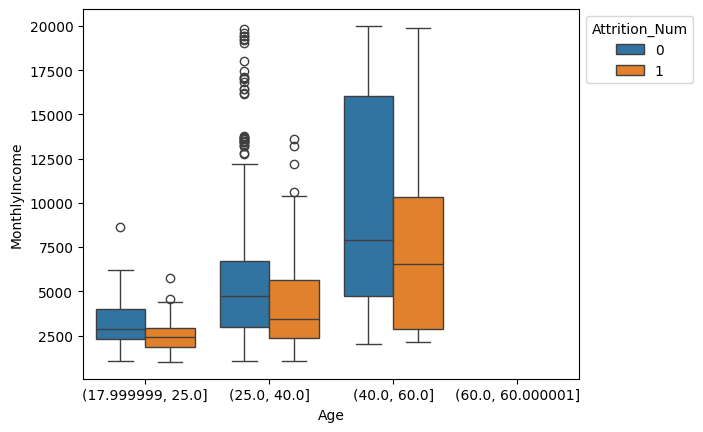

In [818]:
age_bins = [data["Age"].min() - 1e-6, 25, 40, 60, data["Age"].max() + 1e-6]
age_bins.sort()

BoxplotMarital = sns.boxplot(x=pd.cut(data['Age'], age_bins), y="MonthlyIncome", hue="Attrition_Num", data=data)
sns.move_legend(BoxplotMarital, "upper left", bbox_to_anchor=(1, 1))

**__`3.3.`__ Statistical Exploration**

- Numerical Variables

<a id='exp'></stat>

In [819]:

numeric_data = data.select_dtypes(include=['number'])
skewness_kurtosis_df = pd.DataFrame({'Skewness': numeric_data.skew(), 'Kurtosis': numeric_data.kurt()})
skewness_kurtosis_df


Skewness  Kurtosis
Age                       0.413286 -0.404145
DailyRate                -0.003519 -1.203823
DistanceFromHome          0.958118 -0.224833
Education                -0.289681 -0.559115
EnvironmentSatisfaction  -0.321654 -1.202521
HourlyRate               -0.032311 -1.196398
JobInvolvement           -0.498419  0.270999
JobLevel                  1.025401  0.399152
JobSatisfaction          -0.329672 -1.222193
MonthlyIncome             1.369817  1.005233
MonthlyRate               0.018578 -1.214956
NumCompaniesWorked        1.026471  0.010214
PercentSalaryHike         0.821128 -0.300598
PerformanceRating         1.921883  1.695939
RelationshipSatisfaction -0.302828 -1.184814
StockOptionLevel          0.968980  0.364634
TotalWorkingYears         1.117172  0.918270
TrainingTimesLastYear     0.553124  0.494993
WorkLifeBalance          -0.552480  0.419460
YearsAtCompany            1.764529  3.935509
YearsInCurrentRole        0.917363  0.477421
YearsSinceLastPromotion   1.984290  3.612673
YearsWithCurrManager      0.833451  0.171058
Attrition_Num             1.844366  1.403594
Travel_Flag               2.632066  4.934483
Department_Flag          -1.141828  0.311351
EducationField_Flag       0.831517  0.228557
JobRole_Flag              0.675214 -0.534763
MaritalStatus_Flag        0.152175 -1.115037
Gender_Flag              -0.408665 -1.835492
OverTime_Flag             0.964489 -1.071221

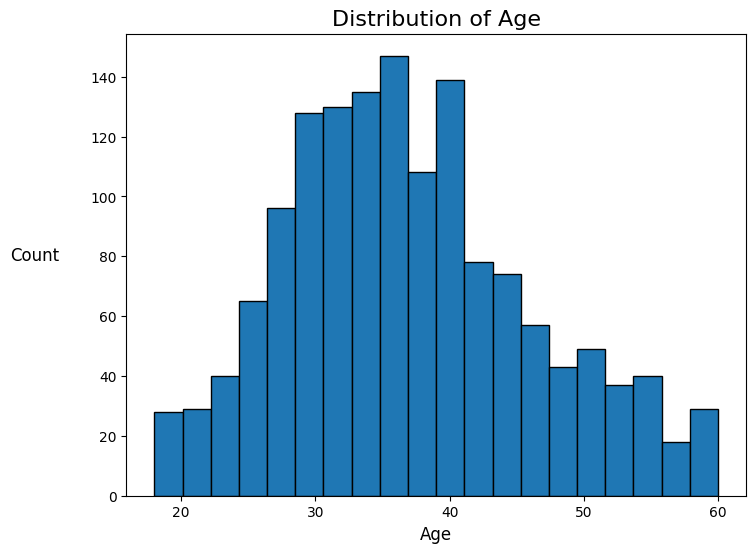

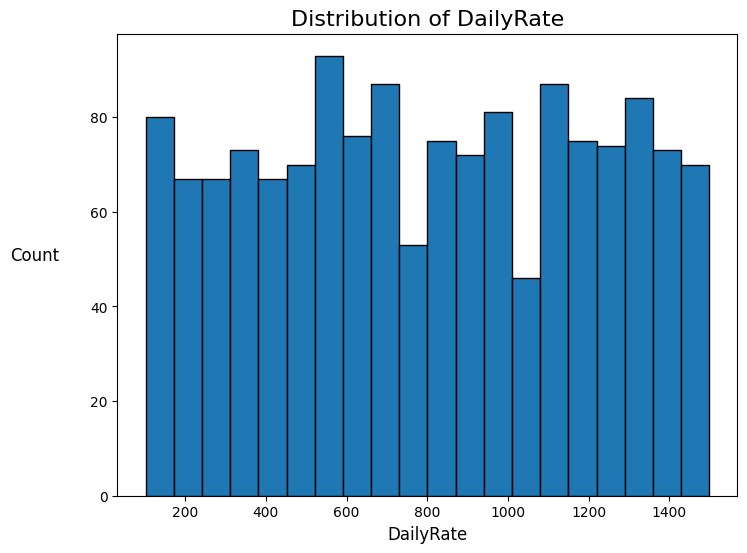

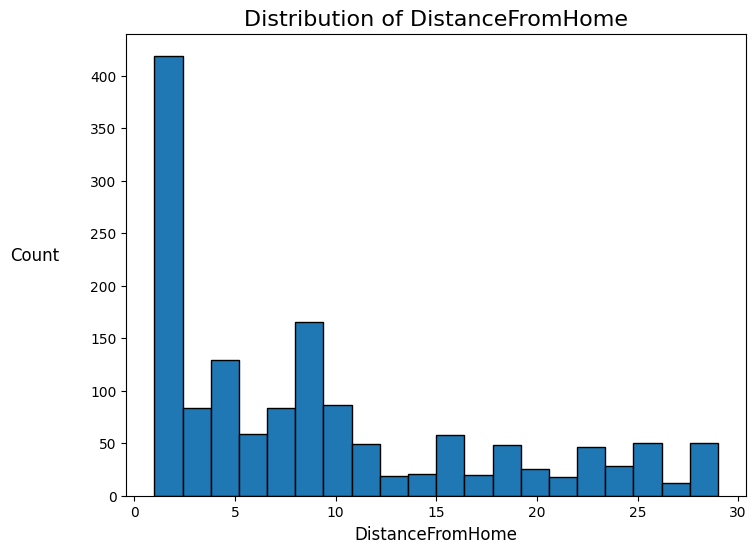

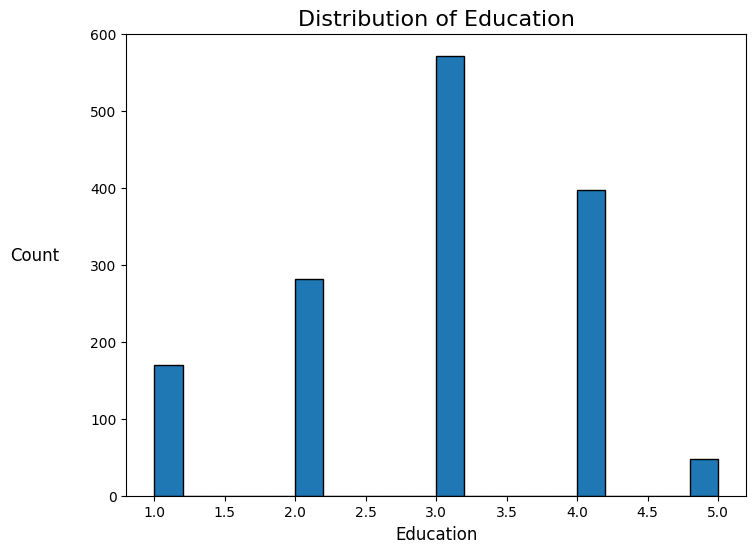

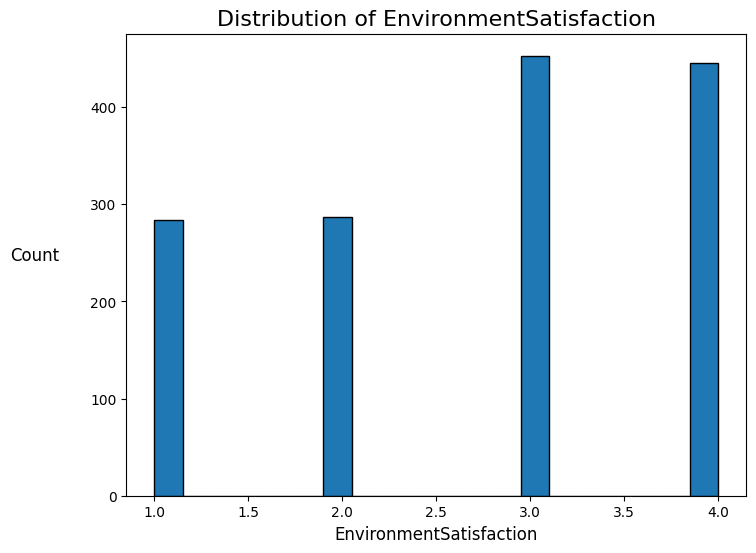

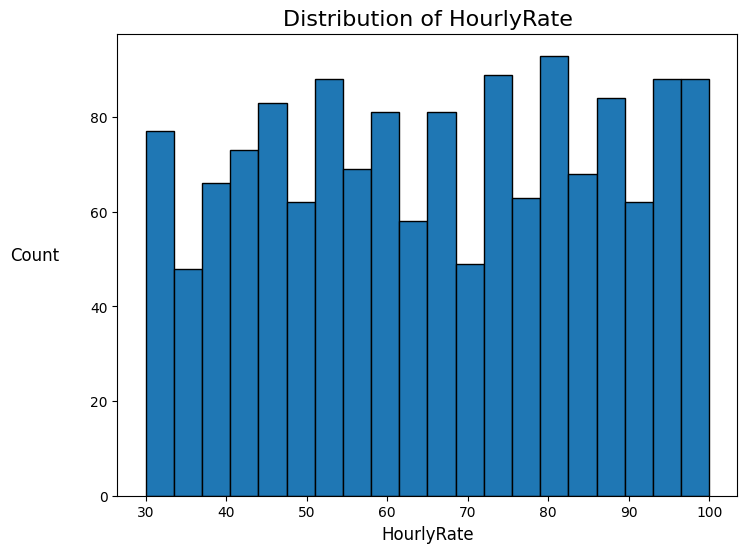

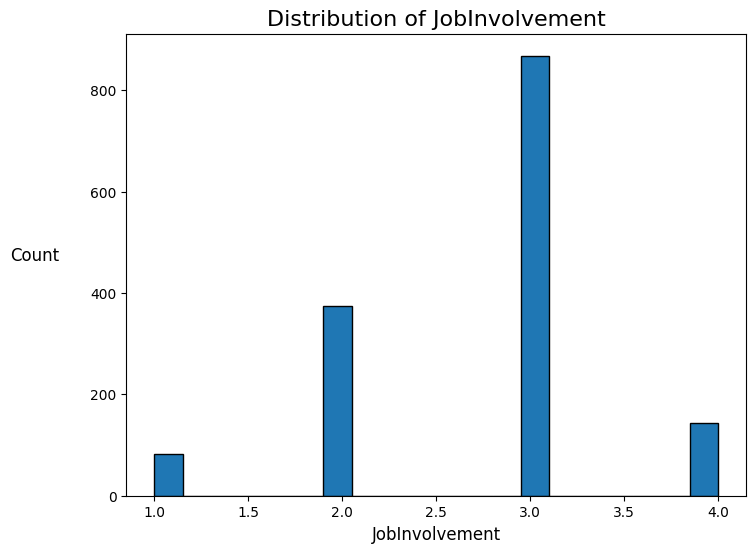

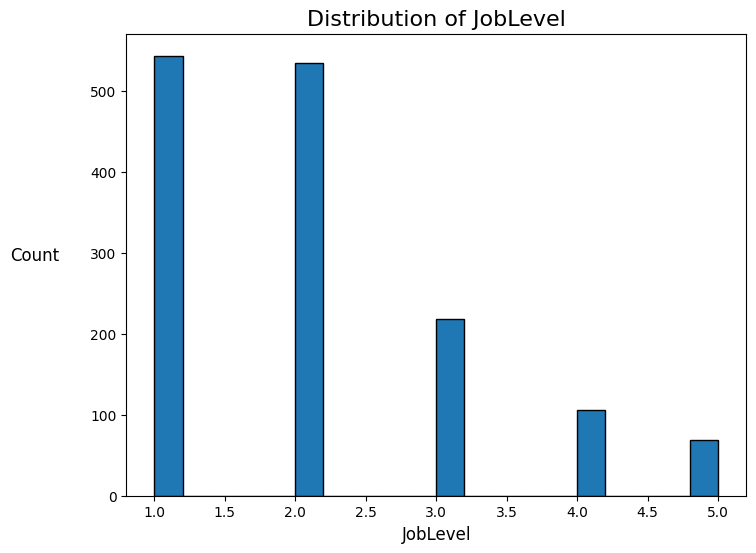

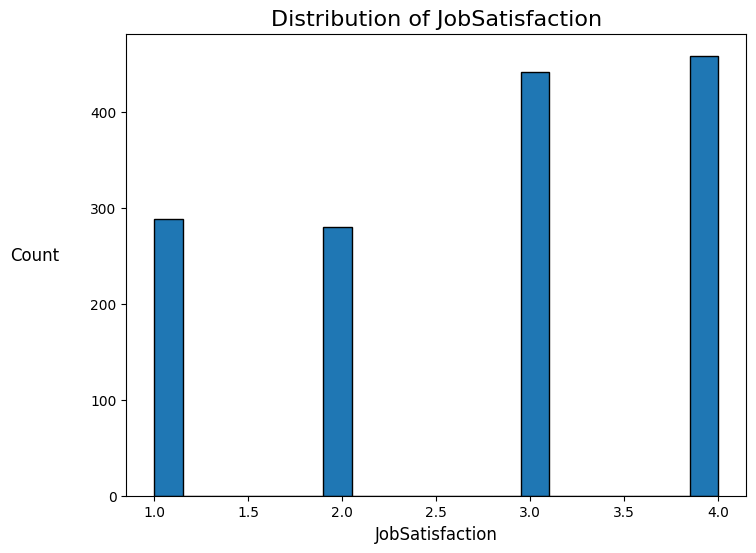

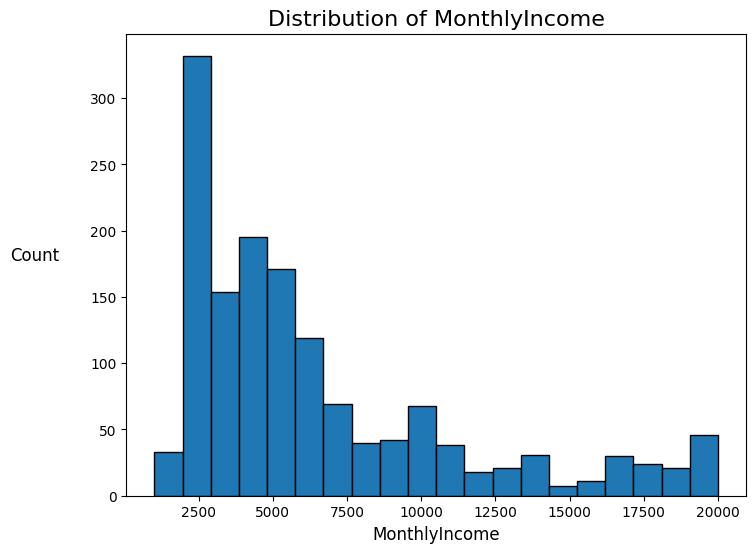

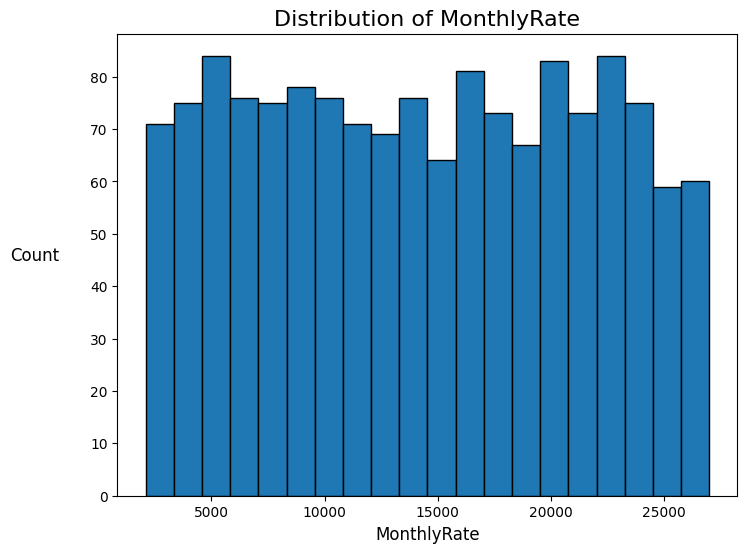

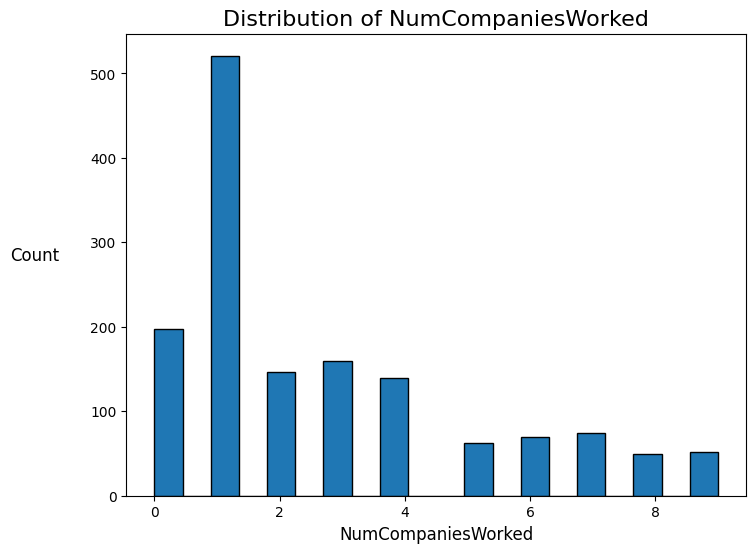

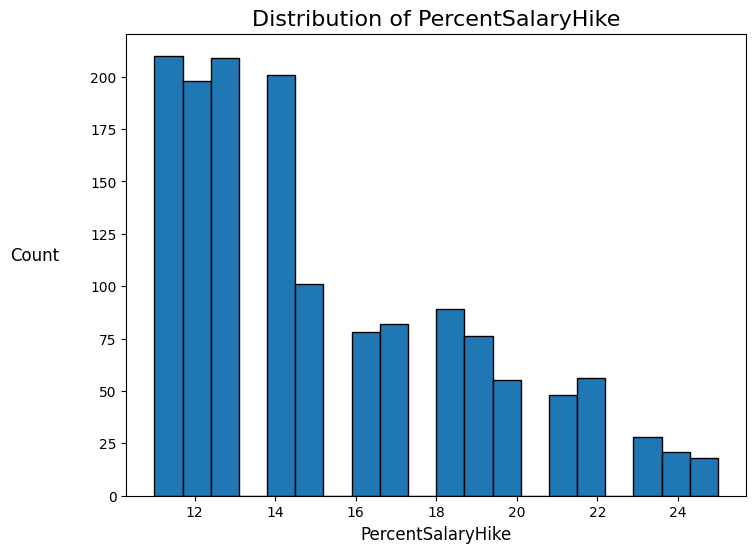

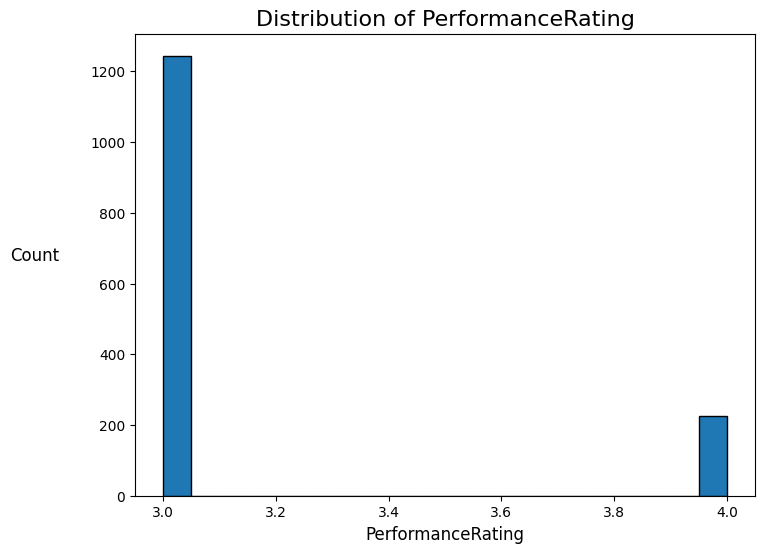

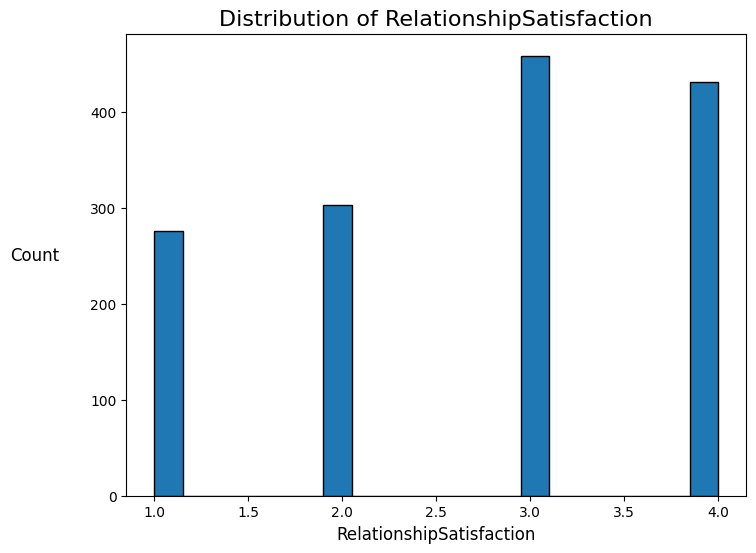

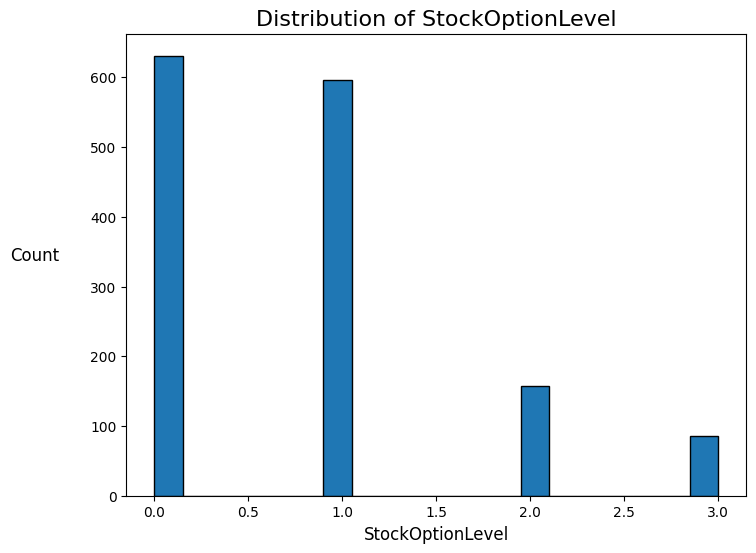

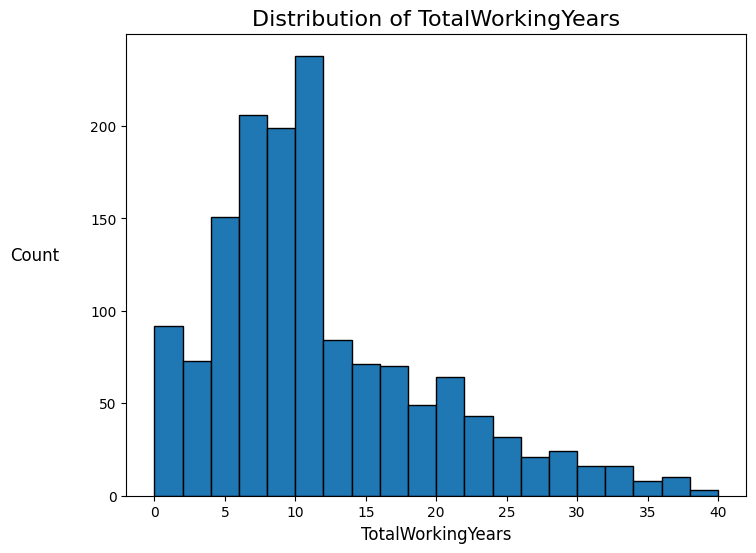

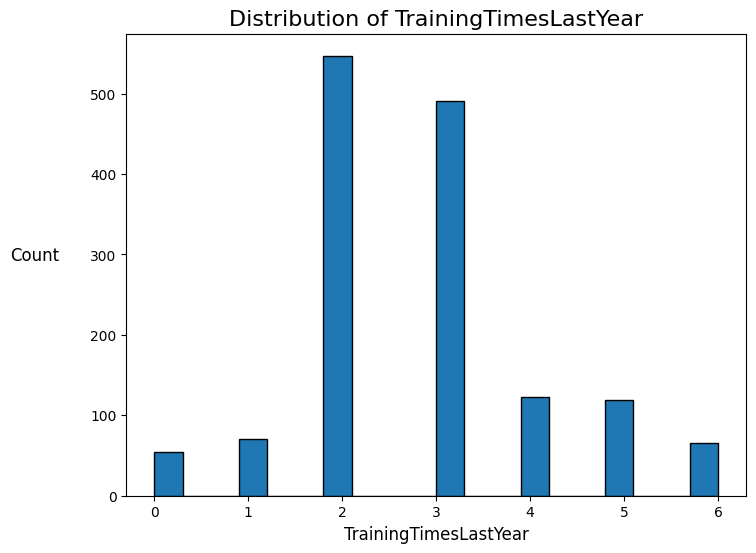

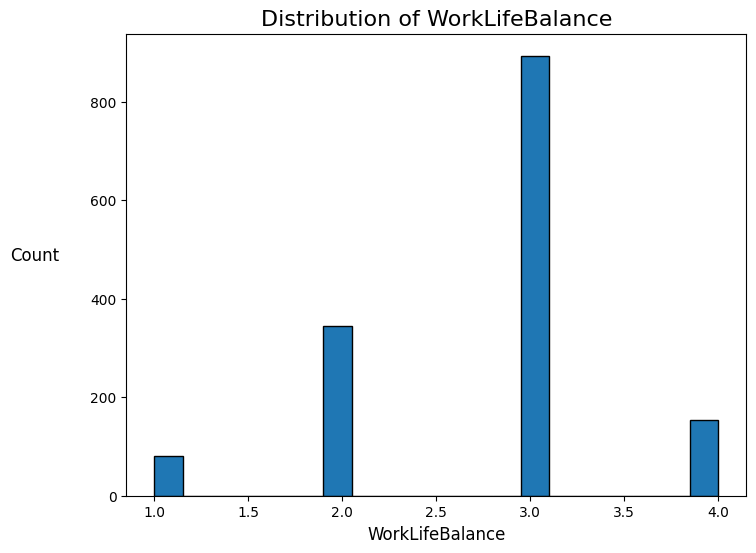

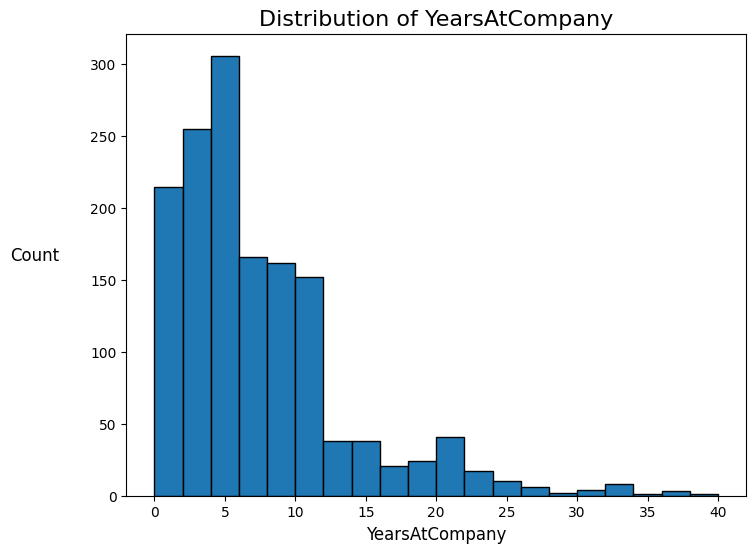

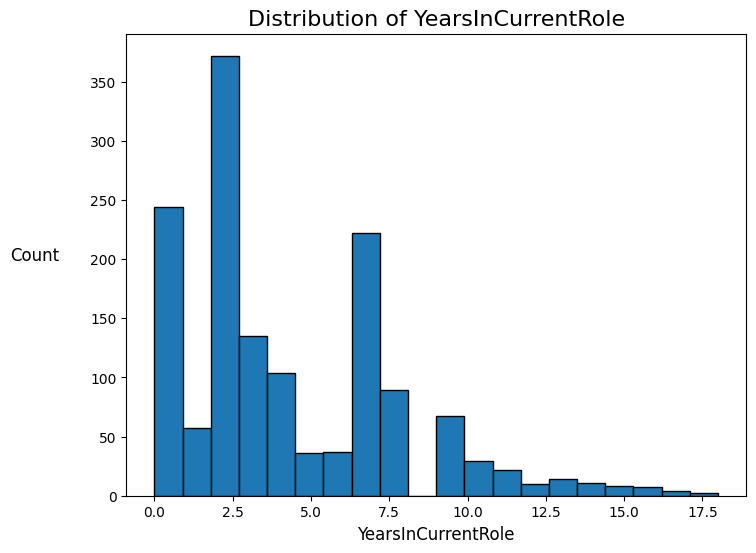

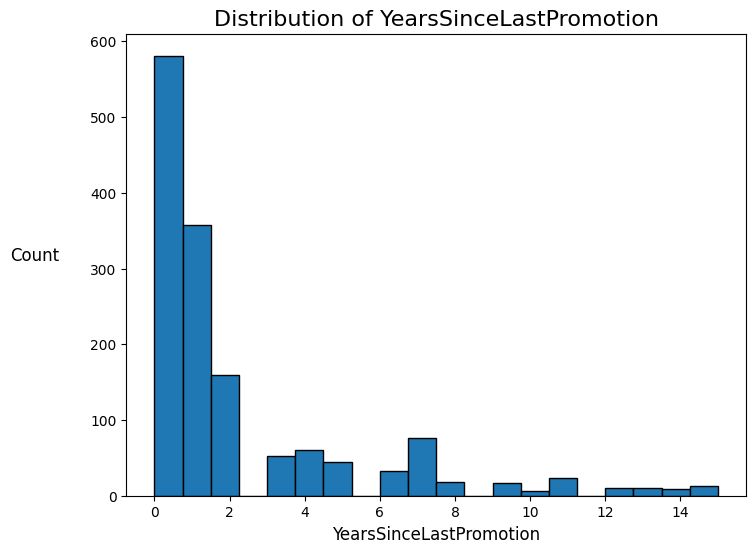

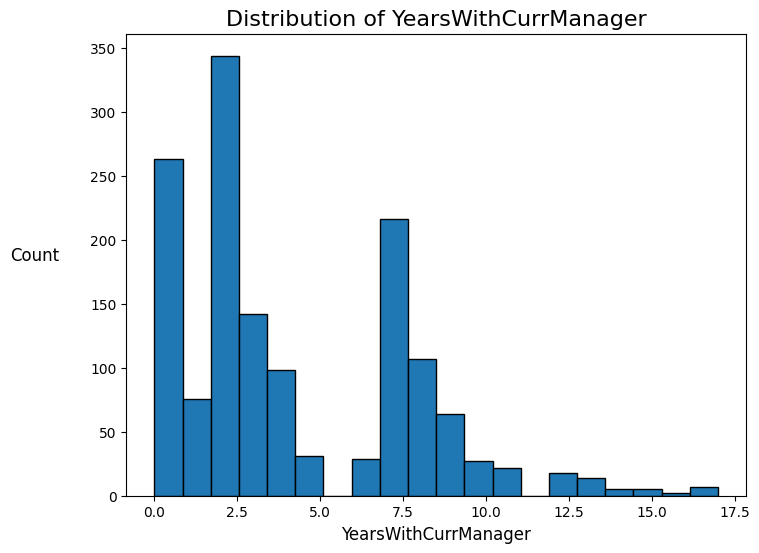

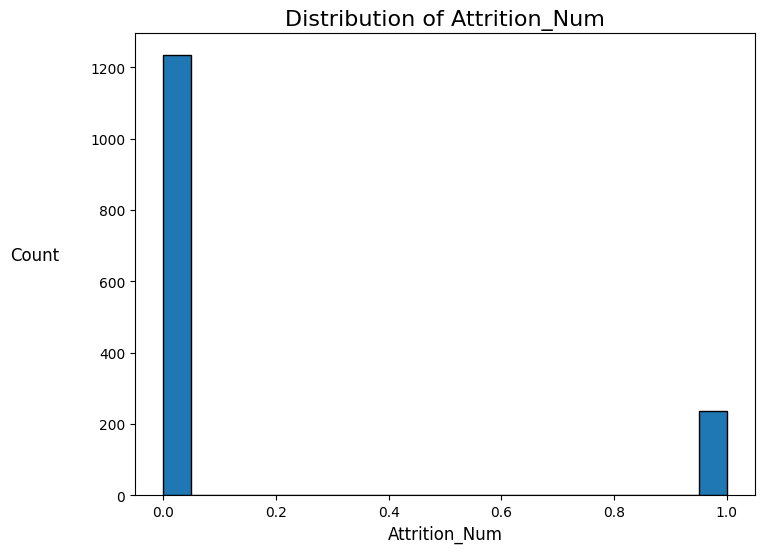

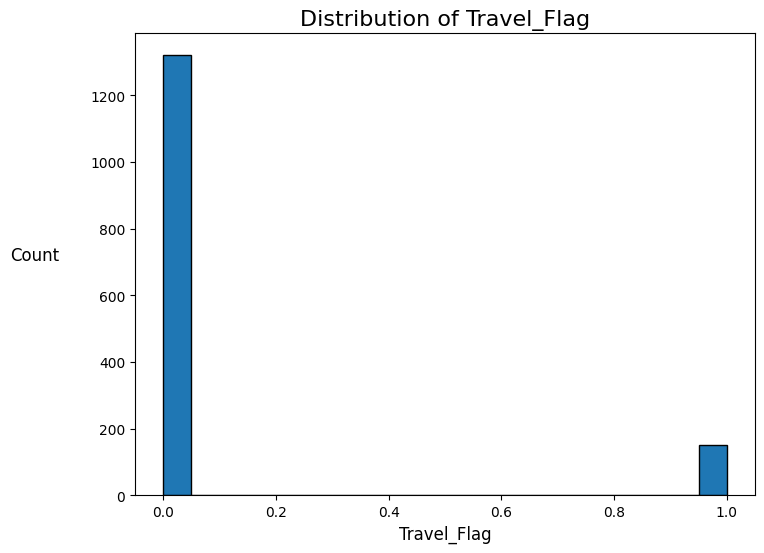

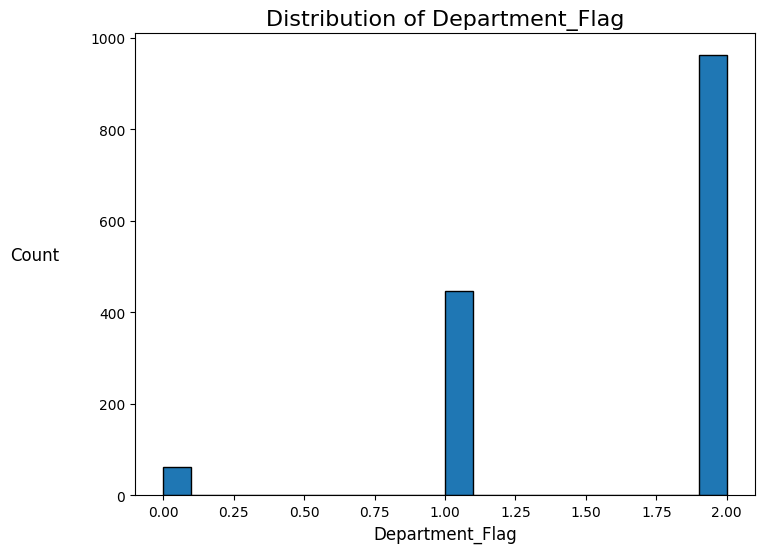

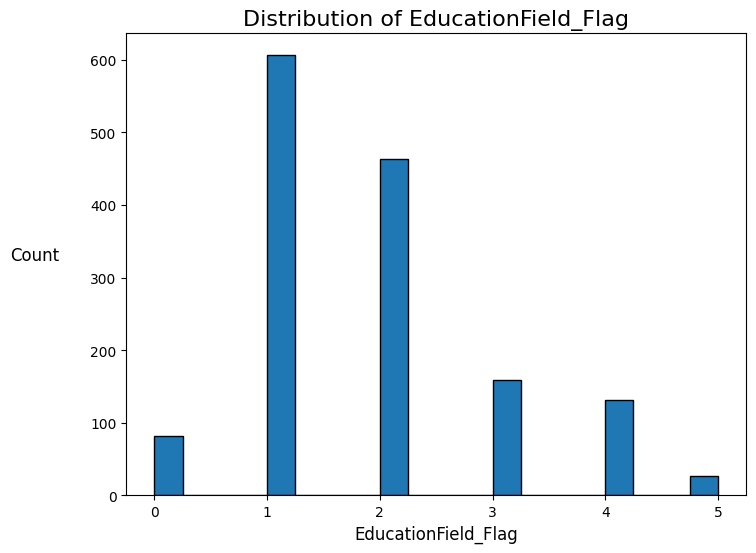

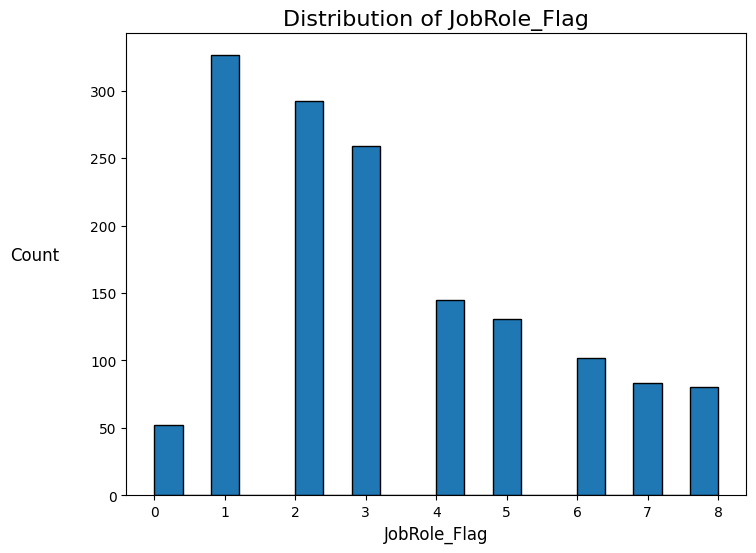

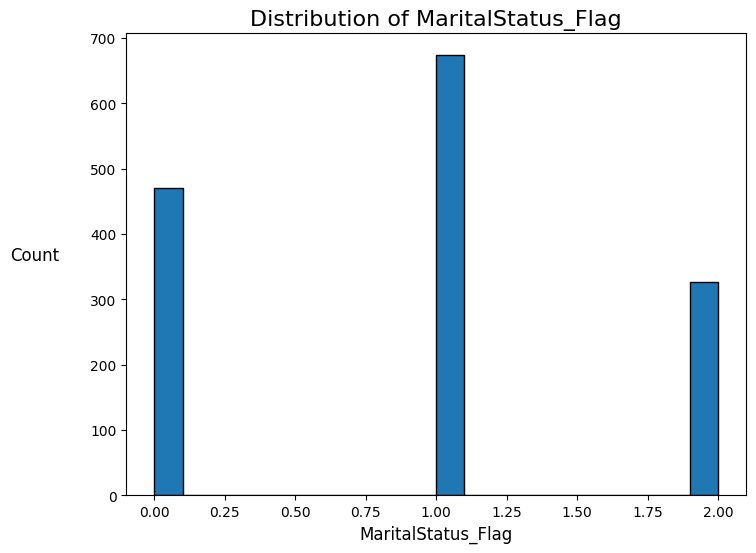

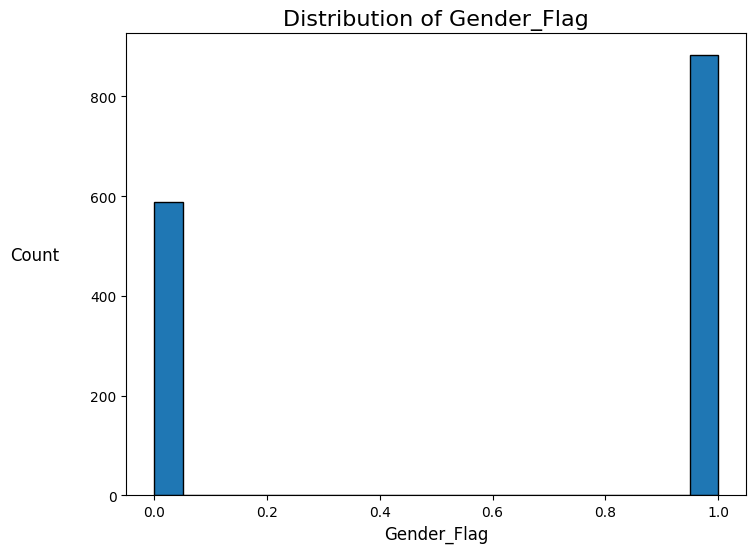

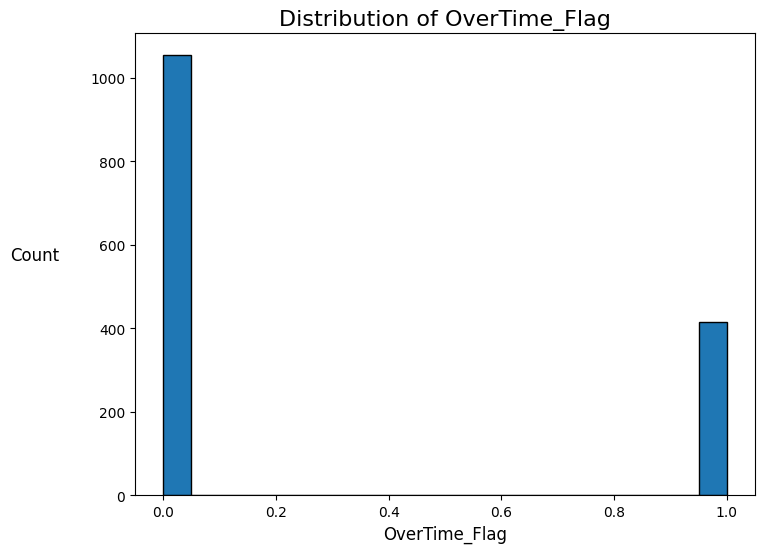

In [820]:

# Histogram of numerical variables
for column in numeric_data.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], edgecolor='black', bins=20)  # You can adjust the number of bins as needed
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12, rotation=0, labelpad=40)
    plt.show()


**Correlation Matrix**

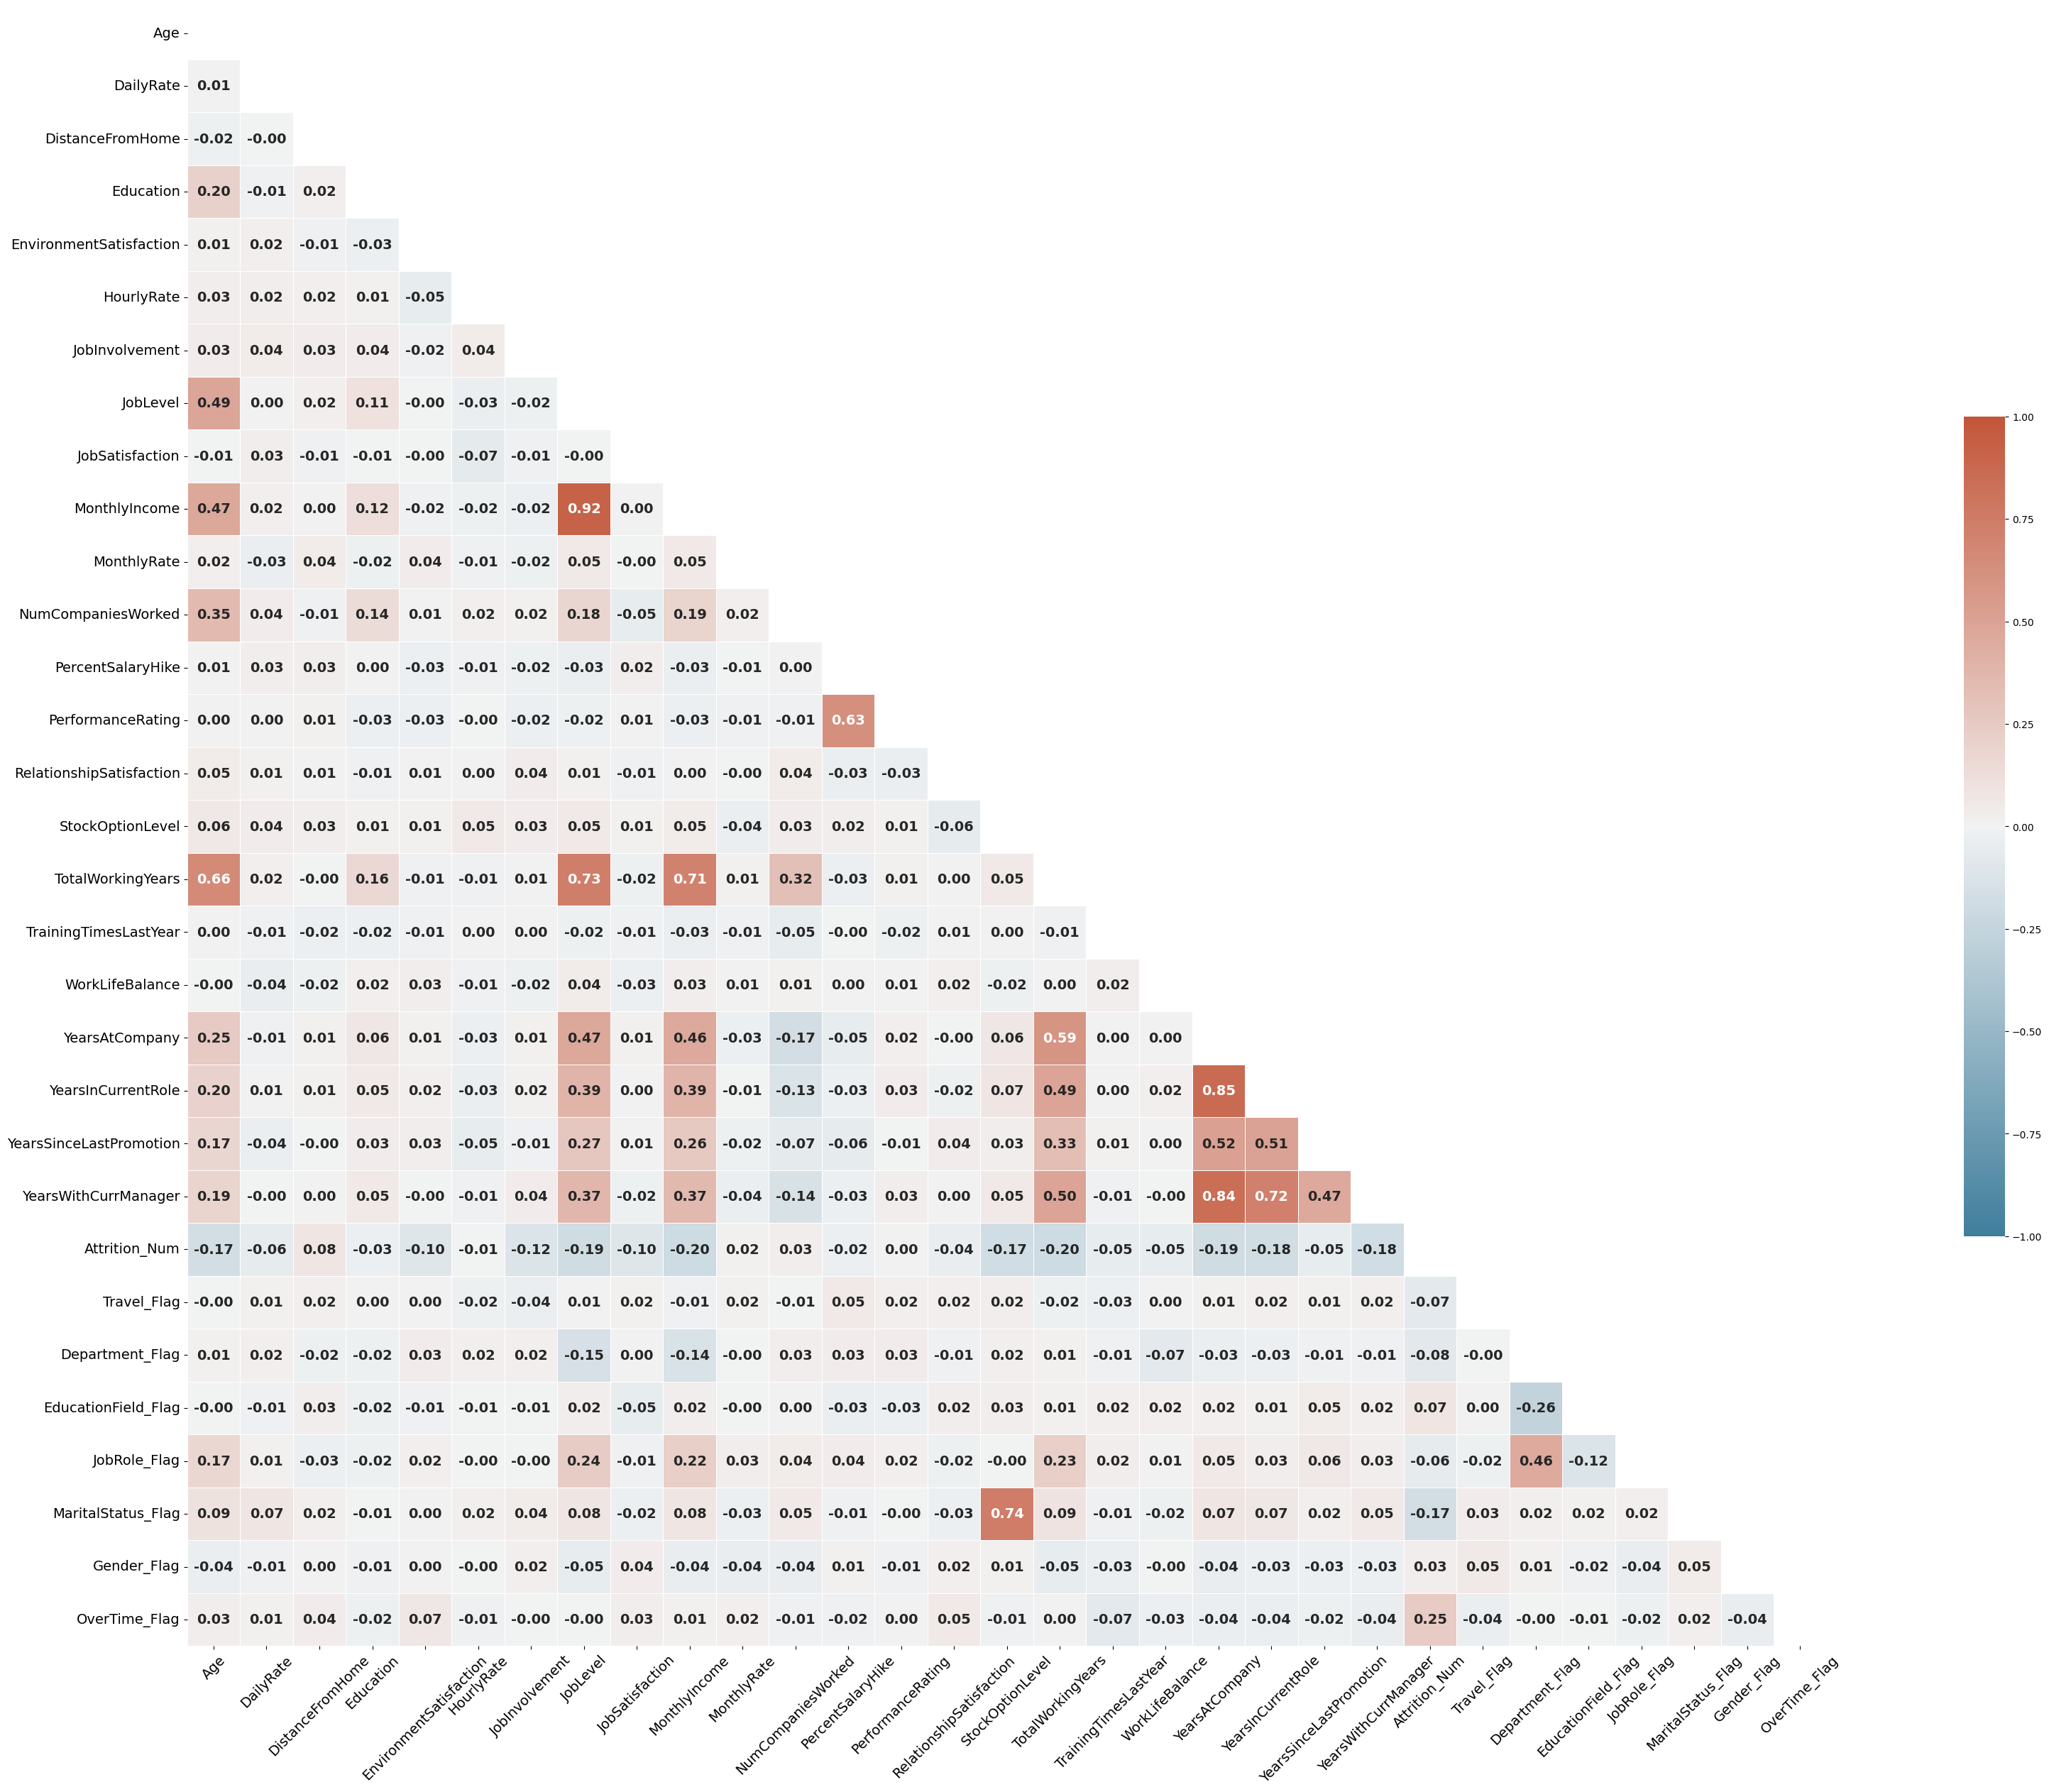

In [821]:

df_corr = numeric_data.corr(method = 'spearman')

mask = np.triu(np.ones_like(df_corr, dtype=bool))

f, ax = plt.subplots(figsize=(50, 30))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, annot=True, fmt='0.2f', linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"fontweight": "bold", "fontsize": "14"})

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.show()

<div style="background-color: #3399CC; color: white; padding: 10px;">
<a id='scrub'>
<h3 style="color: white;"><strong>4. Feature Selection</strong></h3>
</a>
</div>

In [822]:
############################################ FEATURE SELECTION ############################################
#!pip install scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method

import warnings
warnings.filterwarnings('ignore')

Create a new instance of StratifiedKFold named as `skf`, with the following hyperparameters:
- n_splits = 5
- random_state = 99
- shuffle = True

In [823]:
categoricalVar = data.select_dtypes(include=['object']).columns.tolist()
numericalVar= data.select_dtypes(exclude=['object']).columns.tolist()

print("The numerical variables are: \n{}.".format((numericalVar)))
print("\nThe non-numerical variables are:\n{}.".format(categoricalVar))

print("\nIn summary:")
pd.DataFrame(([categoricalVar, numericalVar]),index = ['Categorical Variables', 'Numerical Variables']).T

The numerical variables are: 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Num', 'Travel_Flag', 'Department_Flag', 'EducationField_Flag', 'JobRole_Flag', 'MaritalStatus_Flag', 'Gender_Flag', 'OverTime_Flag'].

The non-numerical variables are:
[].

In summary:


Categorical Variables       Numerical Variables
0                   None                       Age
1                   None                 DailyRate
2                   None          DistanceFromHome
3                   None                 Education
4                   None   EnvironmentSatisfaction
5                   None                HourlyRate
6                   None            JobInvolvement
7                   None                  JobLevel
8                   None           JobSatisfaction
9                   None             MonthlyIncome
10                  None               MonthlyRate
11                  None        NumCompaniesWorked
12                  None         PercentSalaryHike
13                  None         PerformanceRating
14                  None  RelationshipSatisfaction
15                  None          StockOptionLevel
16                  None         TotalWorkingYears
17                  None     TrainingTimesLastYear
18                  None           WorkLifeBalance
19                  None            YearsAtCompany
20                  None        YearsInCurrentRole
21                  None   YearsSinceLastPromotion
22                  None      YearsWithCurrManager
23                  None             Attrition_Num
24                  None               Travel_Flag
25                  None           Department_Flag
26                  None       EducationField_Flag
27                  None              JobRole_Flag
28                  None        MaritalStatus_Flag
29                  None               Gender_Flag
30                  None             OverTime_Flag

<a class="anchor" id="5th-bullet">

### 4.1.1. Categorical features
    
</a>

We are going to use chi-square to understand which categorical variables should we keep. <br>


<a class="anchor" id="6th-bullet">

#### __`4.1.1.1. Chi-Square (Filter Method) - For categorical data`__
    
</a>

In [824]:
X = data.drop('Attrition_Num', axis = 1)
y = data['Attrition_Num'].copy()

Dropping `Over18`, since they are irrelevant for feature selection


In [825]:
#Teste

`apply_chisquare` to select features from the categorical variables using `chi2_contigency`from `scipy.stats`.

In [826]:
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method

import warnings
warnings.filterwarnings('ignore')

In [827]:
def apply_chisquare(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

`select_best_cat_features` 

In [828]:
def select_best_cat_features(X,y):
    count = 1
    
    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        #################################### SELECT FEATURES WITH CHI-SQUARE #######################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using chi-square
        X_train_cat = X_train[['Travel_Flag','Department_Flag','Education', 'EducationField_Flag', 'Gender_Flag', 'JobRole_Flag', 'MaritalStatus_Flag', 'OverTime_Flag', 'StockOptionLevel']].copy()
        for var in X_train_cat:
            apply_chisquare(X_train_cat[var],y_train, var)
            
        count+=1

In [829]:
data

Age  DailyRate  DistanceFromHome  Education  \
EmployeeNumber                                                
1                41       1102                 1          2   
2                49        279                 8          1   
4                37       1373                 2          2   
5                33       1392                 3          4   
7                27        591                 2          1   
...             ...        ...               ...        ...   
2061             36        884                23          2   
2062             39        613                 6          1   
2064             27        155                 4          3   
2065             49       1023                 2          3   
2068             34        628                 8          3   

                EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
EmployeeNumber                                                                  
1                                     2          94               3         2   
2                                     3          61               2         2   
4                                     4          92               2         1   
5                                     4          56               3         1   
7                                     1          40               3         1   
...                                 ...         ...             ...       ...   
2061                                  3          41               4         2   
2062                                  4          42               2         3   
2064                                  2          87               4         2   
2065                                  4          63               2         2   
2068                                  2          82               4         2   

                JobSatisfaction  MonthlyIncome  MonthlyRate  \
EmployeeNumber                                                
1                             4           5993        19479   
2                             2           5130        24907   
4                             3           2090         2396   
5                             3           2909        23159   
7                             2           3468        16632   
...                         ...            ...          ...   
2061                          4           2571        12290   
2062                          1           9991        21457   
2064                          2           6142         5174   
2065                          2           5390        13243   
2068                          3           4404        10228   

                NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
EmployeeNumber                                                             
1                                8                 11                  3   
2                                1                 23                  4   
4                                6                 15                  3   
5                                1                 11                  3   
7                                9                 12                  3   
...                            ...                ...                ...   
2061                             4                 17                  3   
2062                             4                 15                  3   
2064                             1                 20                  4   
2065                             2                 14                  3   
2068                             2                 12                  3   

                RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
EmployeeNumber                                                                  
1                                      1                 0                  8   
2                                      4                 1                 10   
4        

In [830]:
select_best_cat_features(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Travel_Flag is NOT an important predictor. (Discard Travel_Flag from model)
Department_Flag is IMPORTANT for Prediction
Education is NOT an important predictor. (Discard Education from model)
EducationField_Flag is IMPORTANT for Prediction
Gender_Flag is NOT an important predictor. (Discard Gender_Flag from model)
JobRole_Flag is IMPORTANT for Prediction
MaritalStatus_Flag is IMPORTANT for Prediction
OverTime_Flag is IMPORTANT for Prediction
StockOptionLevel is IMPORTANT for Prediction
_________________________________________________________________________________________________

                                     SPLIT 2                                    
___________________________________________________

What can we conclude?

We should remove Gender and Educaiton fO SURE.m

<a class="anchor" id="7th-bullet">

### 4.1.2. Numerical features
    
</a>

In [831]:
def apply_variance(X_train):
    print(X_train.var())

In [832]:
def select_features_variance(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using variance
        apply_variance(X_train)
            
        count+=1

* INVESTIGATIOON*

In [833]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EnvironmentSatisfaction   1470 non-null   int64
 5   HourlyRate                1470 non-null   int64
 6   JobInvolvement            1470 non-null   int64
 7   JobLevel                  1470 non-null   int64
 8   JobSatisfaction           1470 non-null   int64
 9   MonthlyIncome             1470 non-null   int64
 10  MonthlyRate               1470 non-null   int64
 11  NumCompaniesWorked        1470 non-null   int64
 12  PercentSalaryHike         1470 non-null   int64
 13  PerformanceRating         1470 non-null   int64
 14  RelationshipSatisfaction  1470 non-null   int

In [834]:
def apply_variance(X_train):
    print(X_train.var())

In [835]:
def select_features_variance(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using variance
        apply_variance(X_train)
            
        count+=1

In [836]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)

In [837]:
select_features_variance(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Age                         8.542577e+01
DailyRate                   1.630649e+05
DistanceFromHome            6.529640e+01
Education                   1.050976e+00
EnvironmentSatisfaction     1.219349e+00
HourlyRate                  4.076624e+02
JobInvolvement              5.056680e-01
JobLevel                    1.268768e+00
JobSatisfaction             1.201251e+00
MonthlyIncome               2.303965e+07
MonthlyRate                 5.080834e+07
NumCompaniesWorked          6.148617e+00
PercentSalaryHike           1.323087e+01
PerformanceRating           1.243704e-01
RelationshipSatisfaction    1.149805e+00
StockOptionLevel            7.268085e-01
TotalWorkingYears           6.296801e+01
TrainingTimesLastYear    

### Spearman

We can use Spearman correlation to determine if we have redundant variables that should be removed due to their high correlation.

In [840]:
def cor_heatmap(cor):
    plt.figure(figsize=(9,6))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [841]:
def apply_correlation(X_train):
    correlation_data = X_train
    matrix = correlation_data.corr(method = 'spearman')
    cor_heatmap(matrix)

In [843]:
def redundant_features(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')
        
        # check which features to use using spearman correlation
        apply_correlation(X_train)
        
        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


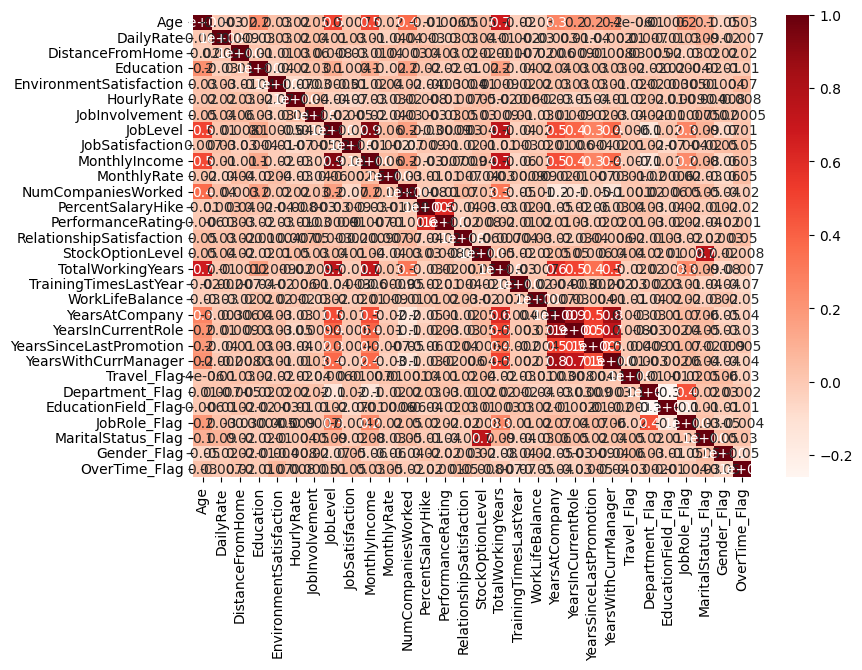

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


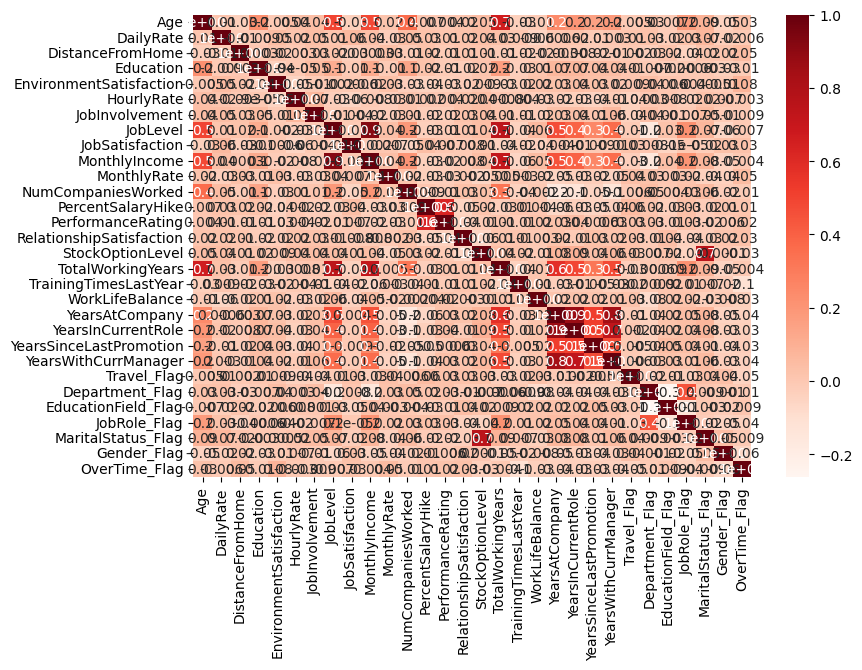

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


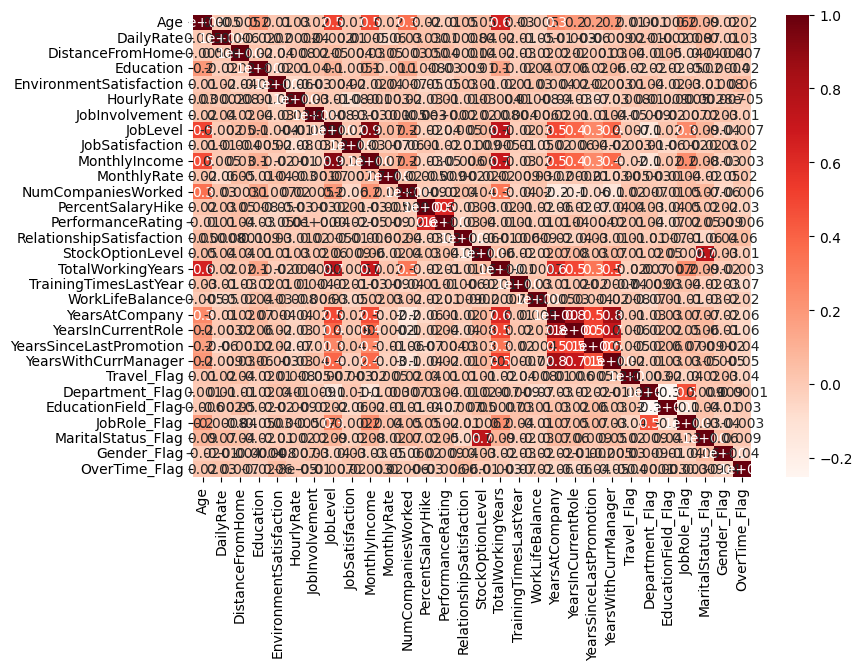

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


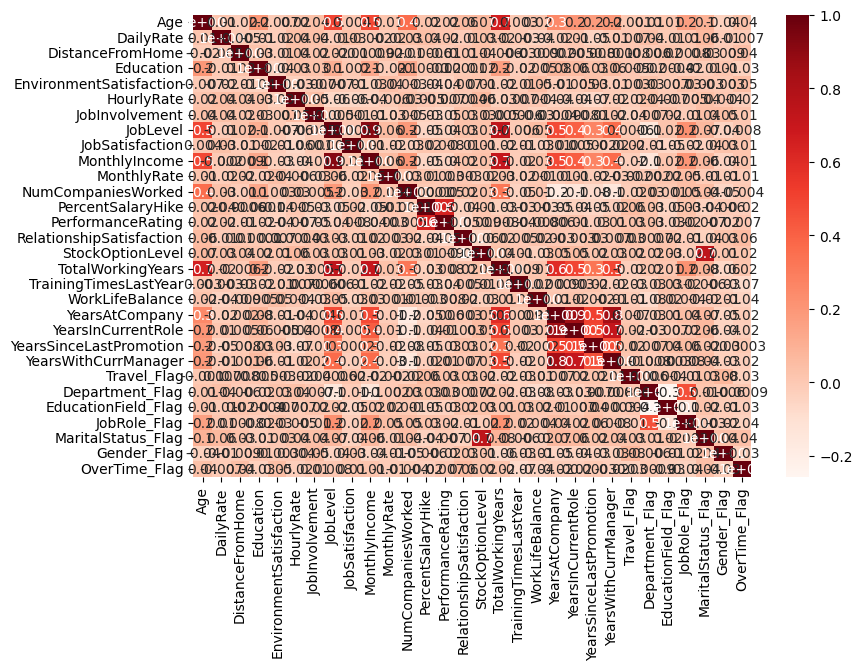

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


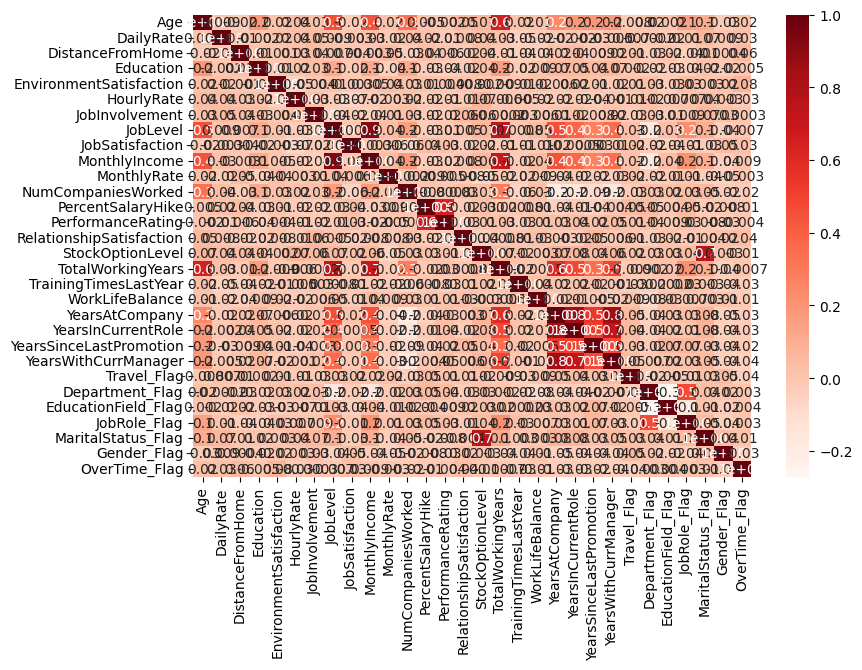

In [844]:
redundant_features(X, y)


Now it is time to understand the ones that we should keep and the ones to be removed. <br>

The remaining methods that we are going to apply  for feature selection are: 
- __Wrapper methods__ - RFE
- __Embedded Methods__ - Lasso Regression and Decision Trees

It is important to note that regression models are particularly sensible to correlated features. Therefore, we will begin by applying decision trees to identify which features among the correlated ones should be excluded. 

Once we have eliminated the correlated features, we can proceed with techniques that involve regression models, such as RFE (using Logistic Regression) and Lasso Regression.

### Decision Trees


In [845]:
def plot_importance(variables,name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [846]:
def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

In [849]:
def select_best_features_dt(X, y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using decision Tree
       
        apply_dt(X_train, y_train)
        
        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


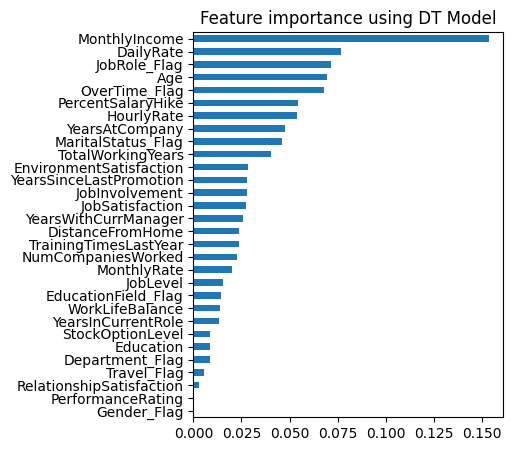

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


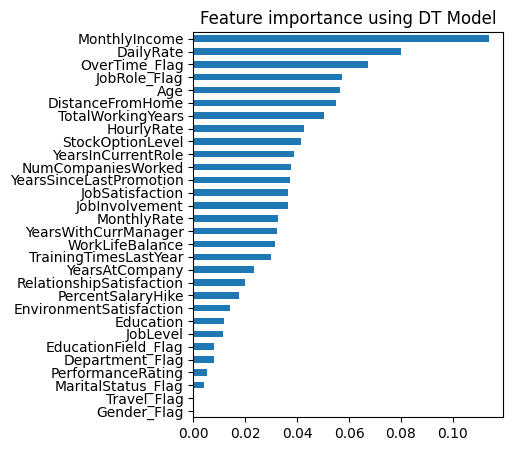

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


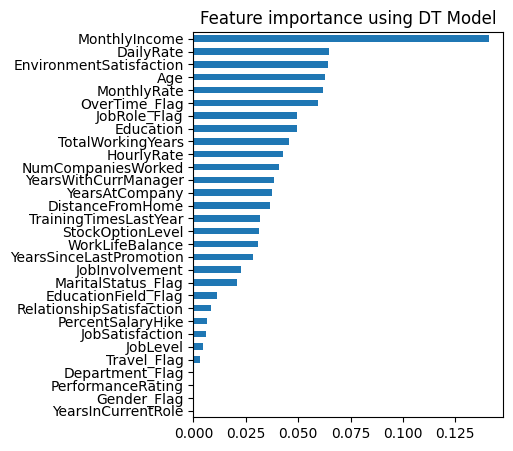

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


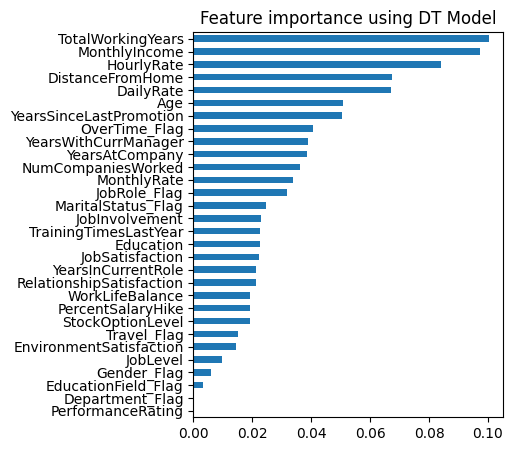

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


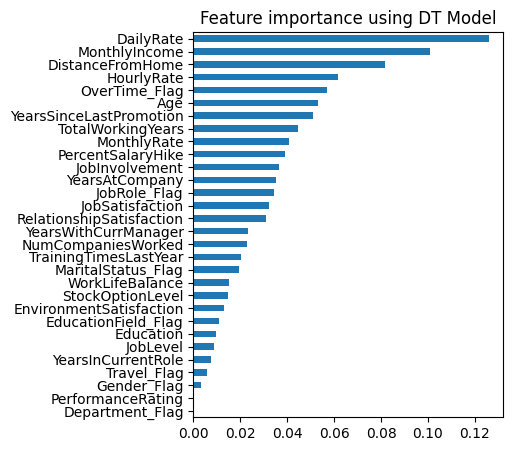

In [850]:
select_best_features_dt(X, y)

We had identified previously with correlation matrix that two groups of variables that seem to be highly correlated among them, namely:
- JobLevel, MonthlyIncome
- YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager

From the first group, we are going to include only MonthlyIncome, the variable that according to decision trees feature importance appears five times as one the most important. We remove `JobLevel`.

From the second group, we are going to keep YearsWithCurrentManger, that appears always more important than YearsinCurrentRole and the other one. 

Not sure ---

In [852]:
X = X.drop(['JobLevel','YearsAtCompany','YearsInCurrentRole'], axis = 1)

### RFE, Lasso and DT


In [855]:
def apply_rfe(X_train, y_train):
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
    rfe.fit_transform(X = X_train, y = y_train)
    selected_features = pd.Series(rfe.support_, index = X_train.columns)
    print(selected_features)

In [857]:
def apply_lasso(X_train, y_train):
    lasso = LassoCV().fit(X_train, y_train)
    coef = pd.Series(lasso.coef_, index = X_train.columns)
    plot_importance(coef,'Lasso')

In [858]:
def select_best_features(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ########################################### SCALE DATA #################################################### 
        numerical_data = X_train.drop(['Travel_Flag','Department_Flag','Education', 'EducationField_Flag', 'Gender_Flag', 'JobRole_Flag', 'MaritalStatus_Flag', 'OverTime_Flag', 'StockOptionLevel'], axis = 1).copy()
        scaler = MinMaxScaler().fit(numerical_data)
        X_train_scaled = scaler.transform(numerical_data)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)
    
        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')
        
  # Check which features to use using RFE
        print('')
        print('----------------- RFE ----------------------')
        apply_rfe(X_train_scaled, y_train)
        
        # check which features to use using lasso
        print('')
        print('----------------- LASSO ----------------------')
        apply_lasso(X_train_scaled, y_train)
            
        # check which features to use using DT
        print('')
        print('----------------- DT ----------------------')
        apply_dt(X_train_scaled, y_train)
            
        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Age                          True
DailyRate                   False
DistanceFromHome            False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement               True
JobSatisfaction             False
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsSinceLastPromotion      True
YearsWithCurrManager         True
dtype: bool

----------------- LASSO ----------------------


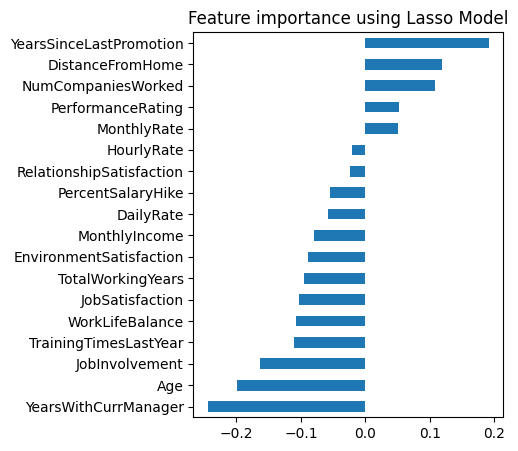


----------------- DT ----------------------


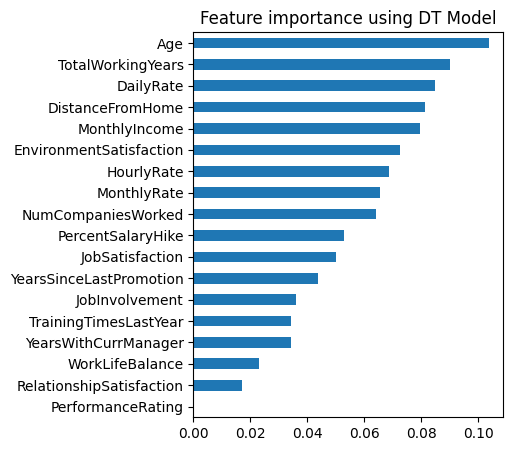

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Age                          True
DailyRate                   False
DistanceFromHome            False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement               True
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
TotalWorkingYears            True
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsSinceLastPromotion      True
YearsWithCurrManager         True
dtype: bool

----------------- LASSO ----------------------


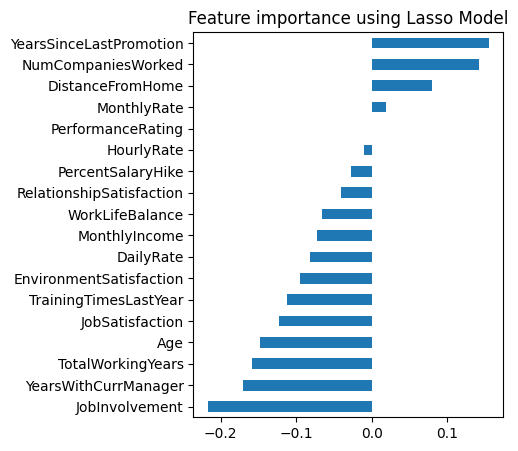


----------------- DT ----------------------


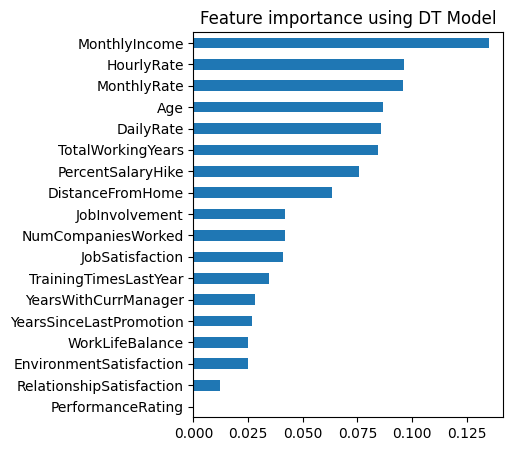

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Age                          True
DailyRate                   False
DistanceFromHome            False
EnvironmentSatisfaction      True
HourlyRate                  False
JobInvolvement               True
JobSatisfaction             False
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsSinceLastPromotion     False
YearsWithCurrManager         True
dtype: bool

----------------- LASSO ----------------------


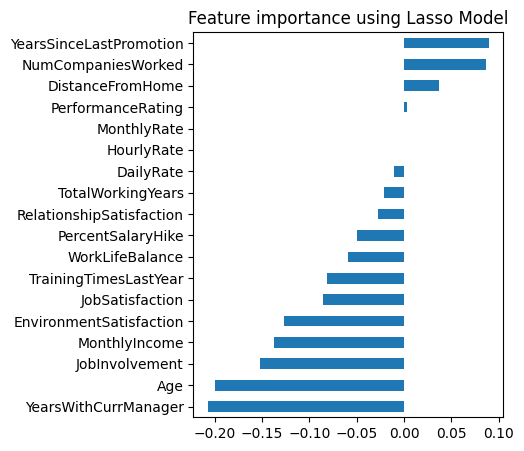


----------------- DT ----------------------


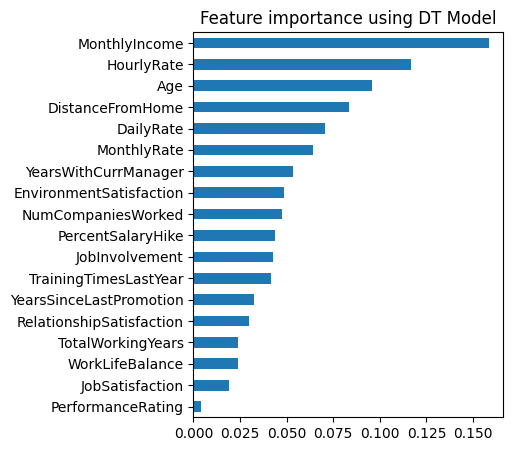

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Age                         False
DailyRate                   False
DistanceFromHome            False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement               True
JobSatisfaction             False
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
TotalWorkingYears            True
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsSinceLastPromotion      True
YearsWithCurrManager         True
dtype: bool

----------------- LASSO ----------------------


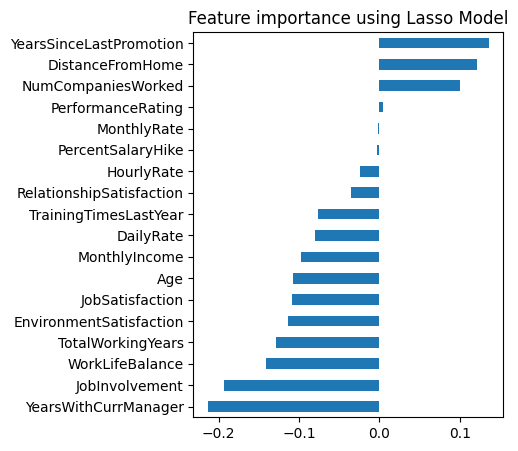


----------------- DT ----------------------


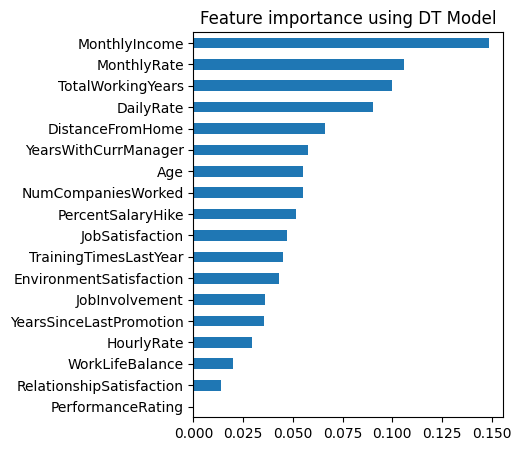

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Age                          True
DailyRate                   False
DistanceFromHome            False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement               True
JobSatisfaction             False
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsSinceLastPromotion      True
YearsWithCurrManager         True
dtype: bool

----------------- LASSO ----------------------


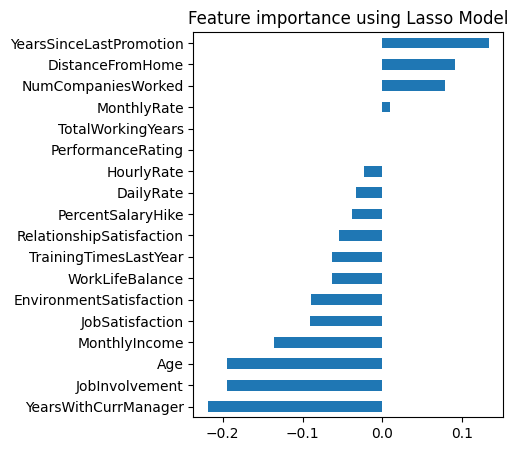


----------------- DT ----------------------


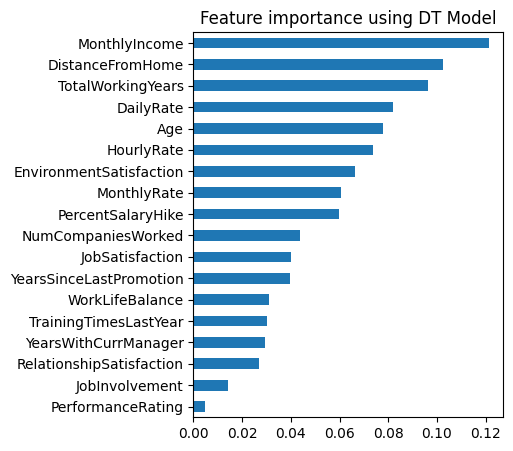

In [859]:
select_best_features(X, y)

<div style="background-color: #3399CC; color: white; padding: 10px;">
<a id='scrub'>
<h3 style="color: white;"><strong>5. Modelling </strong></h3>
</a>
</div>

**Logistic Regression**

In [860]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'imblearn'

**NN**

<div style="background-color: #3399CC; color: white; padding: 10px;">
<a id='scrub'>
<h3 style="color: white;"><strong>6. Interpret</strong></h3>
</a>
</div>

In [838]:
data

Age  DailyRate  DistanceFromHome  Education  \
EmployeeNumber                                                
1                41       1102                 1          2   
2                49        279                 8          1   
4                37       1373                 2          2   
5                33       1392                 3          4   
7                27        591                 2          1   
...             ...        ...               ...        ...   
2061             36        884                23          2   
2062             39        613                 6          1   
2064             27        155                 4          3   
2065             49       1023                 2          3   
2068             34        628                 8          3   

                EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
EmployeeNumber                                                                  
1                                     2          94               3         2   
2                                     3          61               2         2   
4                                     4          92               2         1   
5                                     4          56               3         1   
7                                     1          40               3         1   
...                                 ...         ...             ...       ...   
2061                                  3          41               4         2   
2062                                  4          42               2         3   
2064                                  2          87               4         2   
2065                                  4          63               2         2   
2068                                  2          82               4         2   

                JobSatisfaction  MonthlyIncome  MonthlyRate  \
EmployeeNumber                                                
1                             4           5993        19479   
2                             2           5130        24907   
4                             3           2090         2396   
5                             3           2909        23159   
7                             2           3468        16632   
...                         ...            ...          ...   
2061                          4           2571        12290   
2062                          1           9991        21457   
2064                          2           6142         5174   
2065                          2           5390        13243   
2068                          3           4404        10228   

                NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
EmployeeNumber                                                             
1                                8                 11                  3   
2                                1                 23                  4   
4                                6                 15                  3   
5                                1                 11                  3   
7                                9                 12                  3   
...                            ...                ...                ...   
2061                             4                 17                  3   
2062                             4                 15                  3   
2064                             1                 20                  4   
2065                             2                 14                  3   
2068                             2                 12                  3   

                RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
EmployeeNumber                                                                  
1                                      1                 0                  8   
2                                      4                 1                 10   
4        